<a href="https://colab.research.google.com/github/leonlpz/Reconocimiento_de_Patrones/blob/main/Regularization_pr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularización:

Este notebook tienen la intención de explorar la estrategia de regularización para disminuir el impacto de la maldición de la dimensión que conlleva al sobre ajuste.

In [ ]:
# Se importan las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

## Datos

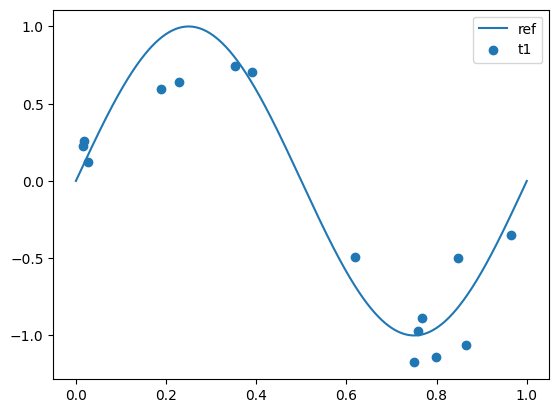

In [ ]:
# Se cargan los datos
X_test = np.linspace(0,1,1000) #Input
t_test = np.sin(2*np.pi*X_test)  #Output

X = np.random.uniform(0,1,15)
X = X.reshape(-1,1)
t0 = np.sin(2*np.pi*X)
t = t0 + 0.2*np.random.normal(0,1,t0.shape)

plt.plot(X_test,t_test,label='ref')
plt.scatter(X,t,label='t1')
plt.legend()
plt.show()

# Actividad 1: Modelado por regresión lineal.

Utilizar el modelo de regresión lineal que se implementó en las primeras clases para solucionar el problema de regresión. Verificar el funcionamiento del modelo para diferentes valores de $M$ en el intervalo $[2,20]$. Para cada valor de $M$ verificar las predicciones del modelo; además, observar la magnitud de los valores $\mathbf{w}$.

Analizar los resultados obtenidos

In [ ]:
# Se crea una nueva clase para el modelo de regresión lineal
from sklearn.base import BaseEstimator

class Linear_Regression(BaseEstimator):

  def __init__(self, M = 10):
        self.M = M
        self.poly = PolynomialFeatures(self.M) # Generar la matriz X_tilde
        self.w = np.random.normal(0,1,(self.M+1,1)) # Inicializamos los parámetros w.

  def fit(self, X, t): # El entrenamiento del modelo
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    X_tilde = self.poly.fit_transform(X)
    self.w = np.linalg.inv(X_tilde.T@X_tilde)@X_tilde.T@t # Calculamos derivando
    # la función de costo con respecto a los parámetros.

    return self

  def predict(self, X): # Hacer predicciones para nuevos datos.
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    X_tilde = self.poly.transform(X)
    y = X_tilde@self.w
    return y

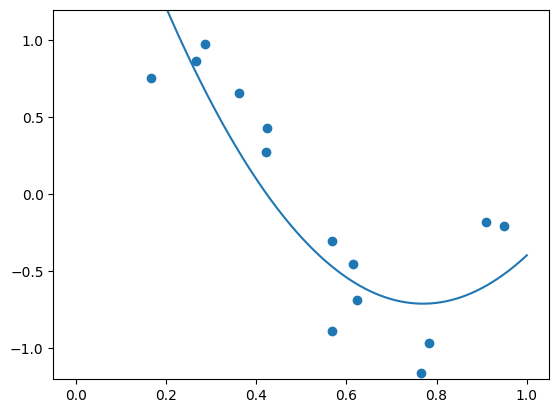

[[ 2.80029865]
 [-9.11805955]
 [ 5.92265718]]


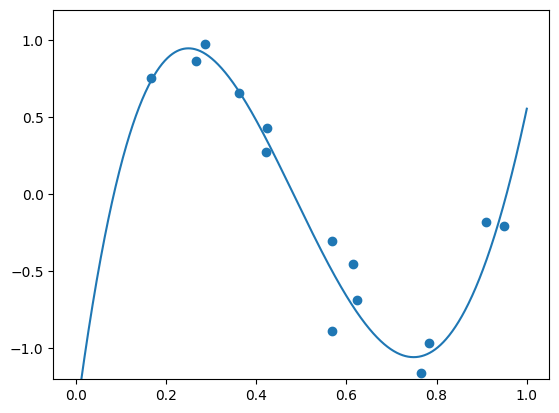

[[ -1.46123857]
 [ 22.41050251]
 [-64.22847679]
 [ 55.51944242]
 [-11.68330587]]


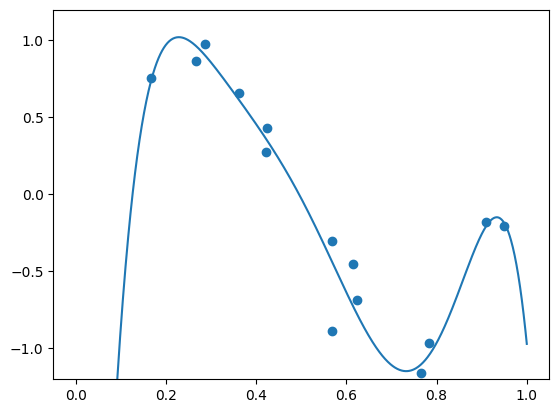

[[   -9.55822893]
 [  151.17869933]
 [ -846.13100269]
 [ 2396.96928867]
 [-3690.74083848]
 [ 2900.26015811]
 [ -902.94833516]]


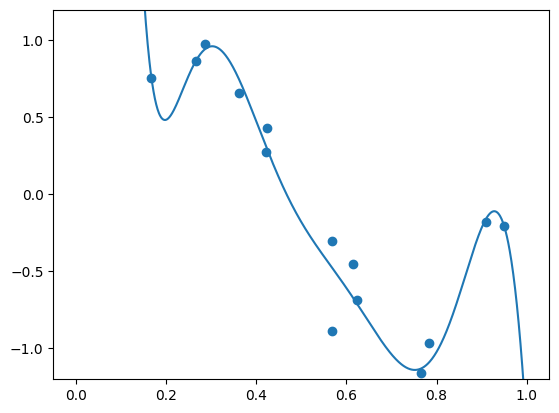

[[ 6.19059262e+01]
 [-1.13767001e+03]
 [ 8.55704208e+03]
 [-3.41841829e+04]
 [ 7.99712116e+04]
 [-1.13080586e+05]
 [ 9.48253953e+04]
 [-4.32105262e+04]
 [ 8.19585761e+03]]


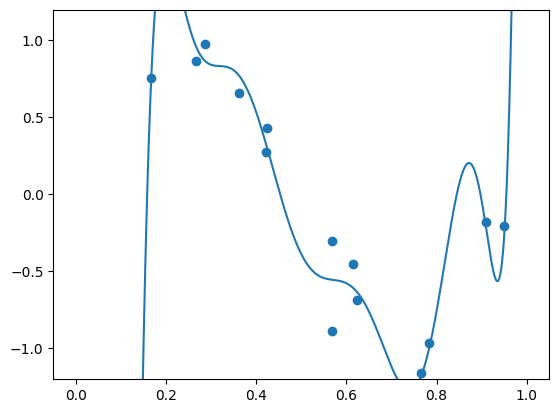

[[-2.50060567e+02]
 [ 4.95267382e+03]
 [-3.91900629e+04]
 [ 1.55772143e+05]
 [-2.90428686e+05]
 [-9.70689023e+03]
 [ 1.21620390e+06]
 [-2.63900961e+06]
 [ 2.73908371e+06]
 [-1.45433207e+06]
 [ 3.16918290e+05]]


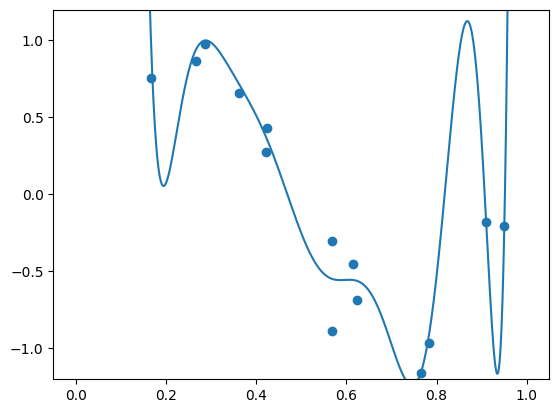

[[ 5.00389820e+02]
 [-1.10253564e+04]
 [ 1.01698951e+05]
 [-5.08559082e+05]
 [ 1.46995012e+06]
 [-2.29364619e+06]
 [ 9.91187240e+05]
 [ 2.71522371e+06]
 [-4.65928639e+06]
 [ 1.72878360e+06]
 [ 2.08419727e+06]
 [-2.27133311e+06]
 [ 6.52353865e+05]]


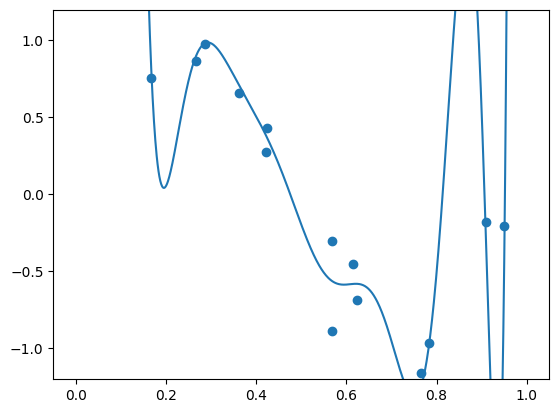

[[ 3.12878356e+02]
 [-6.44643442e+03]
 [ 5.46853905e+04]
 [-2.46939651e+05]
 [ 6.36662669e+05]
 [-9.22117007e+05]
 [ 7.10468099e+05]
 [-4.94140786e+05]
 [ 8.94238560e+05]
 [-9.29811060e+05]
 [ 4.38511828e+05]
 [-1.52969394e+06]
 [ 3.35942695e+06]
 [-2.75624932e+06]
 [ 7.91177897e+05]]


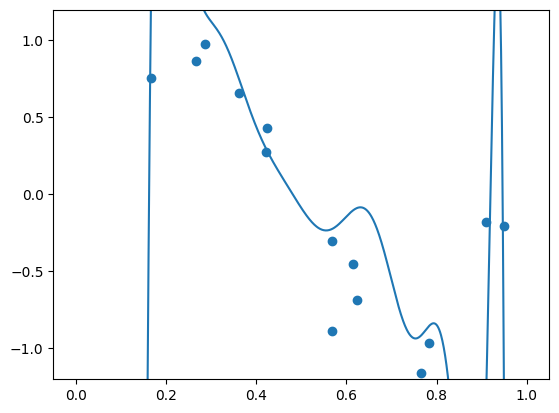

[[-2.56592407e+03]
 [ 6.22742297e+04]
 [-6.42039363e+05]
 [ 3.65926177e+06]
 [-1.23983634e+07]
 [ 2.41743891e+07]
 [-2.03189010e+07]
 [-1.31092519e+07]
 [ 3.76101827e+07]
 [ 1.50408095e+06]
 [-5.62523352e+07]
 [ 3.09927088e+07]
 [ 2.34822919e+07]
 [ 2.12726833e+06]
 [-5.64994124e+07]
 [ 4.83988428e+07]
 [-1.27886981e+07]]


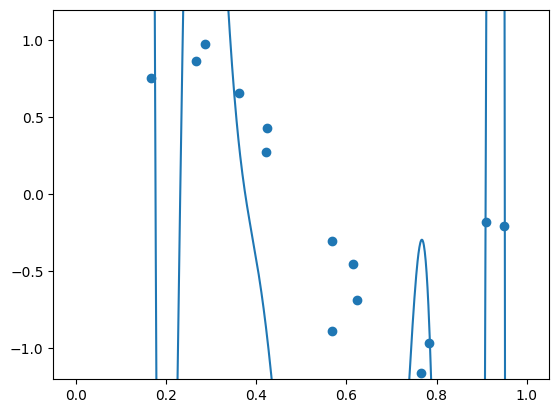

[[ 7.66660214e+03]
 [-1.64455392e+05]
 [ 1.44272398e+06]
 [-6.55467454e+06]
 [ 1.53932984e+07]
 [-1.17850305e+07]
 [-2.48975098e+07]
 [ 5.79690938e+07]
 [-1.34469204e+07]
 [-5.32102521e+07]
 [ 1.74704600e+07]
 [ 2.25937006e+07]
 [ 4.30469969e+07]
 [-2.89380629e+07]
 [-7.49734887e+07]
 [ 1.65540848e+06]
 [ 1.55132357e+08]
 [-1.36761207e+08]
 [ 3.60191897e+07]]


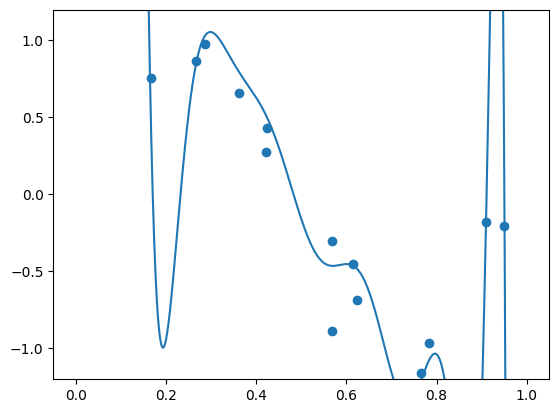

[[ 6.02892313e+02]
 [-1.21140548e+04]
 [ 9.69674965e+04]
 [-3.84271691e+05]
 [ 6.93412974e+05]
 [ 3.71255648e+04]
 [-2.23923904e+06]
 [ 2.88403025e+06]
 [ 1.23886681e+05]
 [-1.36342092e+06]
 [-1.08034985e+06]
 [-1.00836383e+06]
 [ 4.76822298e+06]
 [-7.32175943e+04]
 [-5.03771427e+06]
 [ 2.22474390e+06]
 [ 4.48728425e+06]
 [-1.32289014e+07]
 [ 1.68357699e+07]
 [-9.85600733e+06]
 [ 2.13133091e+06]]


In [ ]:
# Completar con lo requerido.
M_ = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for m in M_:
  Lin_Reg = Linear_Regression(M=m) # Inicialización del modelo.
  Lin_Reg.fit(X, t) # El entrenamiento del modelo.
  pred = Lin_Reg.predict(X_test)
  plt.plot(X_test, pred)
  plt.scatter(X, t)
  plt.ylim([-1.2,1.2])
  plt.show()
  print(Lin_Reg.w)

In [ ]:
print(X.shape)

(15, 1)


# Actividad 2:

* Consultar cómo se calcula la inversa de una matriz $\mathbf{A}$.
* Consultar cuáles son las características de una matriz mal condicionada (cerca a ser singular).
* Definir dos matrices: una matriz bien condicionada $\mathbf{A}$ y una mal condicionada $\mathbf{B}$. Determine la matriz inversa de ambas y observe los valores de cada una. ¿Qué se puede concluir?
* A la matriz mal condicionada agregarle el término $\lambda\mathbf{I}$, tal que se tenga $\mathbf{B} + \lambda \mathbf{I}$, donde $\lambda$ es una constante y $\mathbf{I}$ es la matriz identidad con las mismas dimensiones que $\mathbf{B}$. Calcule la inversa de $\mathbf{B} + \lambda \mathbf{I}$ para diferentes valores de $\lambda$. ¿Que puede concluir a partir de los resultados obtenidos?

In [ ]:
# Completar con lo requerido.

A = np.array([[1, 2, 13],[4, 10, 6], [17, 8, 19]])
print(A)
print(np.linalg.det(A))
print(np.linalg.inv(A))

[[ 1  2 13]
 [ 4 10  6]
 [17  8 19]]
-1599.9999999999984
[[-0.08875 -0.04125  0.07375]
 [-0.01625  0.12625 -0.02875]
 [ 0.08625 -0.01625 -0.00125]]


In [ ]:
B = np.array([[1, 6, 7.0],[2, 7, 8.999999],[3, 8, 11.0]])
print(B)
print(np.linalg.det(B))
print(np.linalg.inv(B))

[[ 1.        6.        7.      ]
 [ 2.        7.        8.999999]
 [ 3.        8.       11.      ]]
-9.99999999251601e-06
[[ -500000.8003742  1000000.0007484  -499999.4003742]
 [ -499999.7003742  1000000.0007484  -500000.1003742]
 [  500000.0003742 -1000000.0007484   500000.0003742]]


In [ ]:
lam = 0.1
B_1 = B + lam*np.eye(B.shape[0])
print(np.linalg.det(B_1))
print(np.linalg.inv(B_1))

-0.8090091999999864
[[ -8.41771391  13.1024468   -5.31513609]
 [ -5.93317975  10.8651422   -5.06792889]
 [  6.5512234  -11.37193495   5.17917472]]


# Actividad 3: Regularización $L_2$

En muchos casos, cuando la cantidad de parámetros de un modelo es comparable o superior a la cantidad disponible de datos, se presenta el fenómeno conocido como la maldición de la dimensión. Dicho fenómeno se caracteriza porque el modelo trata de ajustar, perfectamente, todos los datos de entrenamiento; sin embargo, no tiene capacidad de capturar el comportamiento de los mismos. Una posible solución es cambiar la función de costo de la regresión lineal para incluir un término de regularización que hará que los parámetros tengan una magnitud pequeña. De esta forma, la función de costo debe tomar la forma:

$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N(y_n - t_n)^2 + \lambda ||\mathbf{w}||_{p},$$

donde $||\mathbf{w}||_{p}$ es la norma $p$ de los parámetros $\mathbf{w}$ y $\lambda$ es el factor de regularización. Construya un modelo de regresión lineal con regularización utilizando la norma $L_2$ ($P=2$) que equivale a la norma al cuadrado de los parámetros. Tener en cuenta que para construir el modelo lineal regularizado deberán calcular las derivadas de la nueva función de costo con respecto a los parámetros $\mathbf{w}$.

Probar el modelo construído para diferentes valores de $M$ en el intervalo $[2,20]$ y para los siguientes valores de regularización $\lambda=[1, 0.1, 1\times 10^{-3}, 1\times 10^{-6}, 1\times 10^{-12}]$.

En cada experimento observar el ajuste del modelo a los datos y verificar la magnitud de los parámetros $\mathbf{w}$

In [ ]:
# Completar con lo requerido

In [ ]:
from sklearn.base import BaseEstimator

class Linear_Regression_R(BaseEstimator):

  def __init__(self, M = 10, lam = 1):
        self.M = M
        self.lam = lam
        self.poly = PolynomialFeatures(self.M) # Generar la matriz X_tilde
        self.w = np.random.normal(0,1,(self.M+1,1)) # Inicializamos los parámetros w.

  def fit(self, X, t): # El entrenamiento del modelo
    if len(X.shape) == 1
      X = X.reshape(-1,1)
    X_tilde = self.poly.fit_transform(X)
    self.w = np.linalg.inv(X_tilde.T@X_tilde + self.lam*np.eye(self.M+1))@X_tilde.T@t # Calculamos derivando
    # la función de costo con respecto a los parámetros.

    return self.

  def predict(self, X): # Hacer predicciones para nuevos datos.
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    X_tilde = self.poly.transform(X)
    y = X_tilde@self.w
    return y



-----M =  2 ------lambda =  1


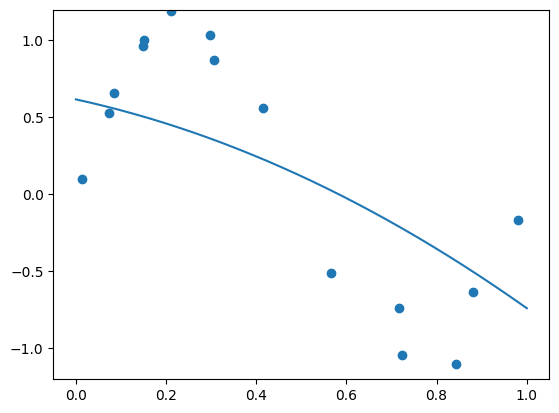

[[ 0.61747177]
 [-0.6388938 ]
 [-0.71724752]]
-----M =  2 ------lambda =  0.1


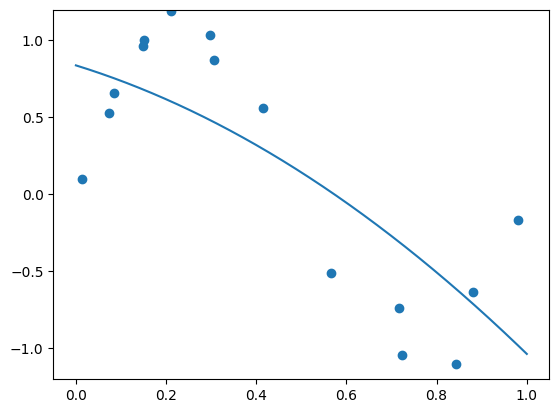

[[ 0.83839049]
 [-0.90663682]
 [-0.96714102]]
-----M =  2 ------lambda =  0.001


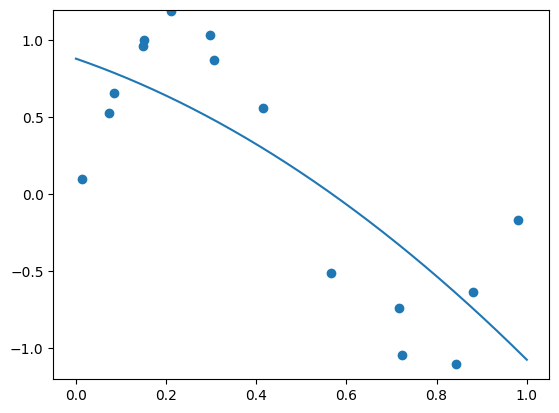

[[ 0.88207212]
 [-1.01153819]
 [-0.94368194]]
-----M =  2 ------lambda =  1e-06


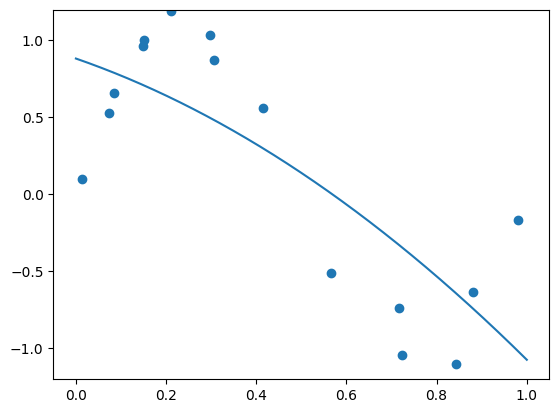

[[ 0.88276519]
 [-1.01427701]
 [-0.94179561]]
-----M =  2 ------lambda =  1e-12


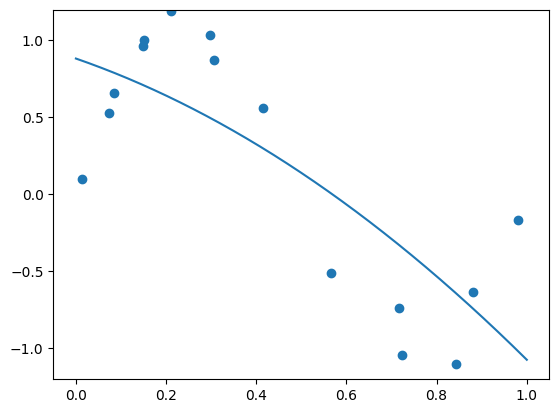

[[ 0.88276589]
 [-1.01427981]
 [-0.94179366]]
-----M =  4 ------lambda =  1


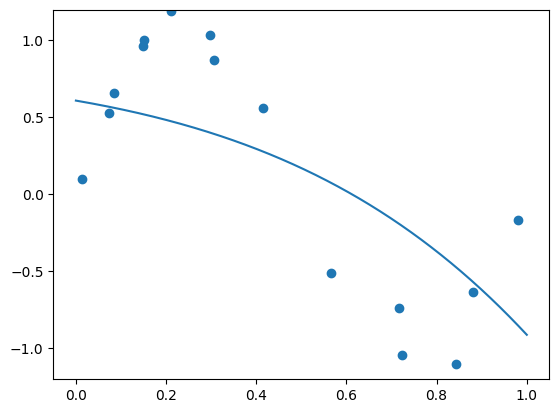

[[ 0.6096144 ]
 [-0.50401653]
 [-0.54174916]
 [-0.33824471]
 [-0.1367093 ]]
-----M =  4 ------lambda =  0.1


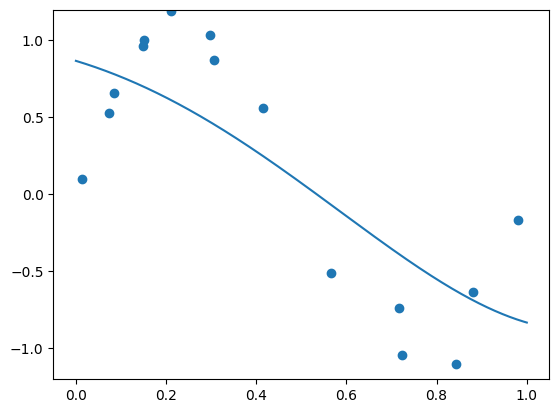

[[ 0.86774284]
 [-0.88914088]
 [-1.49015194]
 [-0.30559729]
 [ 0.98547882]]
-----M =  4 ------lambda =  0.001


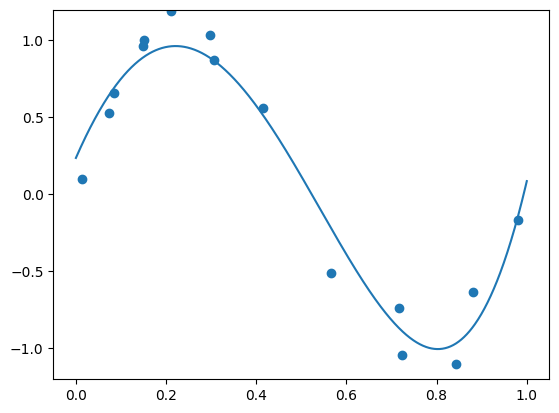

[[  0.23716578]
 [  6.69648596]
 [-15.45306766]
 [ -2.27721252]
 [ 10.88341898]]
-----M =  4 ------lambda =  1e-06


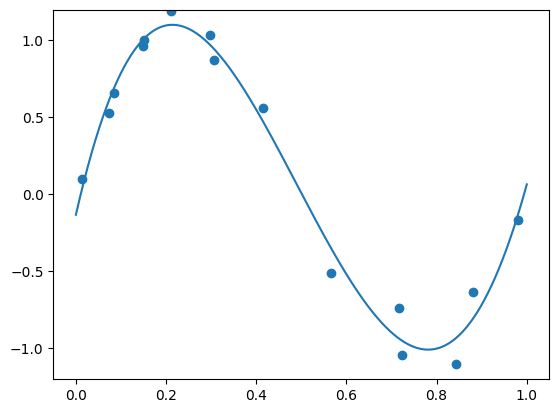

[[ -0.13174051]
 [ 12.85933664]
 [-39.54629418]
 [ 30.67781351]
 [ -3.7936221 ]]
-----M =  4 ------lambda =  1e-12


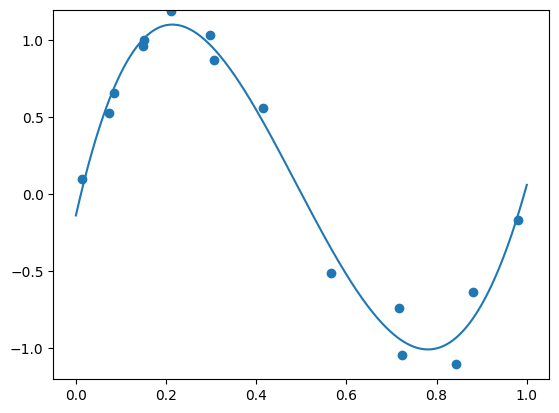

[[ -0.13620011]
 [ 12.95054056]
 [-39.96696619]
 [ 31.32918421]
 [ -4.11422737]]
-----M =  6 ------lambda =  1


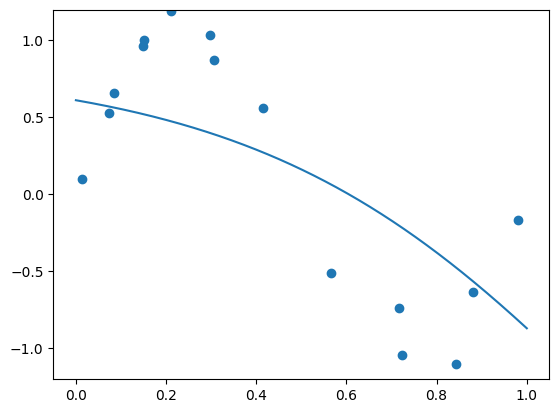

[[ 0.6120409 ]
 [-0.51232603]
 [-0.55863676]
 [-0.36012319]
 [-0.16148075]
 [-0.00350977]
 [ 0.11517905]]
-----M =  6 ------lambda =  0.1


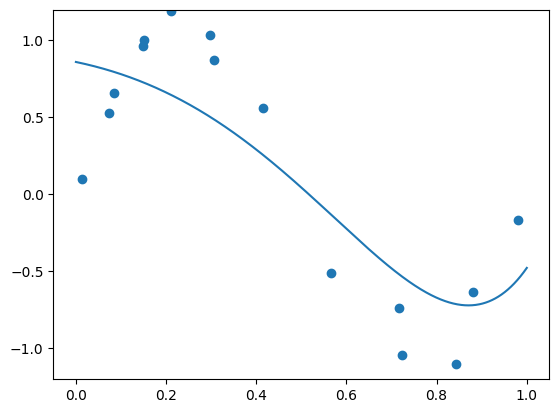

[[ 0.86047523]
 [-0.61183305]
 [-1.69946325]
 [-0.98878224]
 [-0.06086703]
 [ 0.71748281]
 [ 1.30623421]]
-----M =  6 ------lambda =  0.001


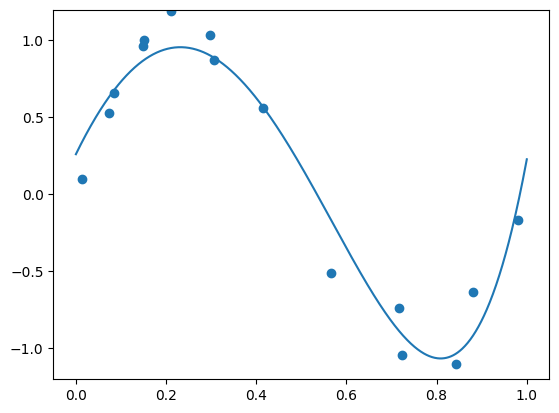

[[  0.26145626]
 [  6.00064761]
 [-12.62370318]
 [ -2.59052153]
 [  3.97942138]
 [  4.38320601]
 [  0.81801072]]
-----M =  6 ------lambda =  1e-06


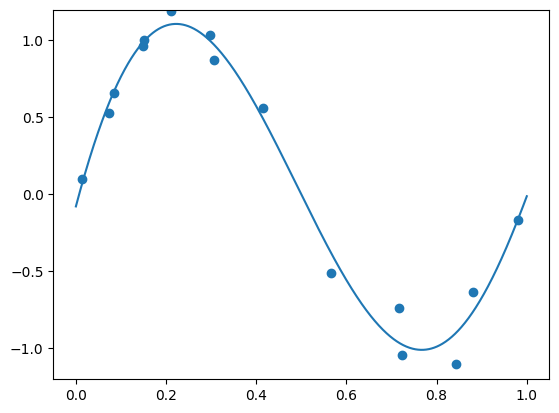

[[ -0.07753413]
 [ 11.09493967]
 [-26.61713098]
 [ -2.93028315]
 [ 28.35794207]
 [ -4.38872901]
 [ -5.45053016]]
-----M =  6 ------lambda =  1e-12


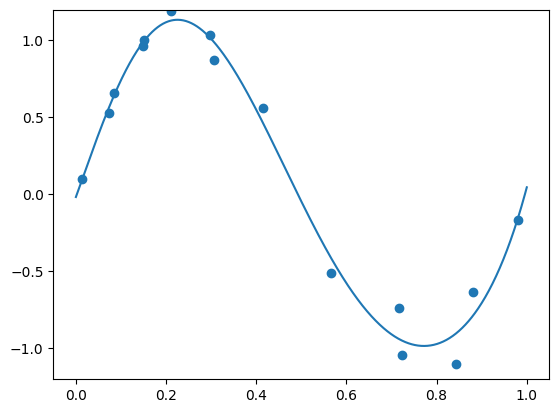

[[-1.63530356e-02]
 [ 8.17669813e+00]
 [ 5.08068954e+00]
 [-1.36204576e+02]
 [ 2.85027041e+02]
 [-2.33253834e+02]
 [ 7.12369465e+01]]
-----M =  8 ------lambda =  1


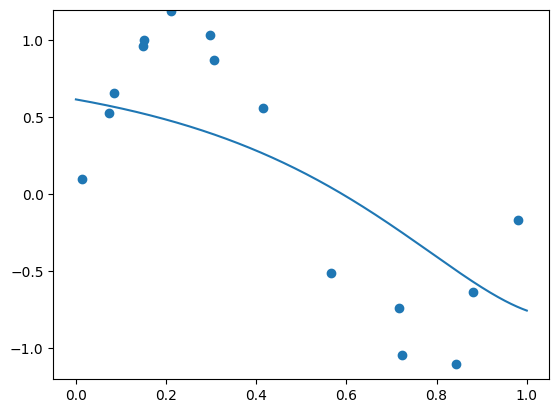

[[ 0.61735457]
 [-0.51989001]
 [-0.58532587]
 [-0.40014528]
 [-0.21040261]
 [-0.05833848]
 [ 0.05647265]
 [ 0.14168744]
 [ 0.20463204]]
-----M =  8 ------lambda =  0.1


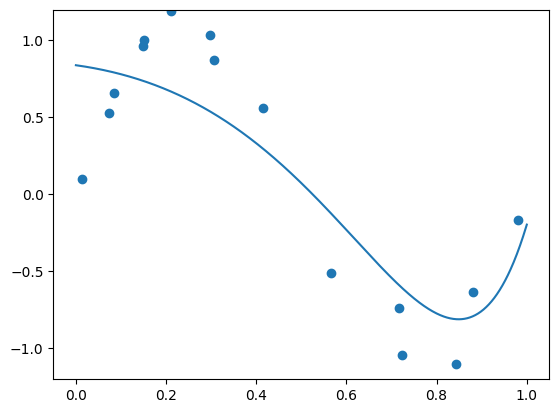

[[ 0.83933578]
 [-0.40888328]
 [-1.63740948]
 [-1.1686004 ]
 [-0.4684104 ]
 [ 0.12126788]
 [ 0.56046276]
 [ 0.87381943]
 [ 1.09271621]]
-----M =  8 ------lambda =  0.001


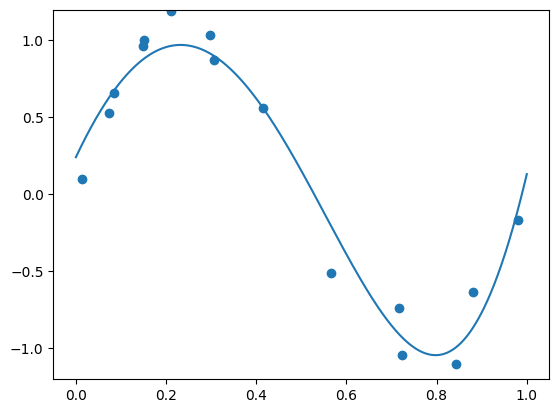

[[  0.24208083]
 [  6.21962095]
 [-12.67491035]
 [ -3.64310296]
 [  3.32883154]
 [  5.26934285]
 [  3.85146729]
 [  0.69901409]
 [ -3.16029802]]
-----M =  8 ------lambda =  1e-06


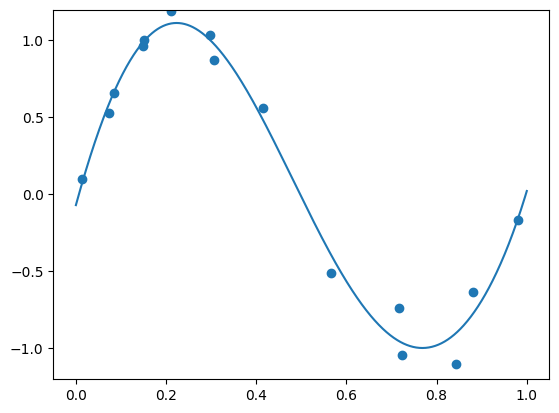

[[ -0.06907212]
 [ 10.69447487]
 [-22.85224401]
 [-13.67947378]
 [ 32.71460626]
 [ 13.4243668 ]
 [-16.11229969]
 [-17.27352532]
 [ 13.17575611]]
-----M =  8 ------lambda =  1e-12


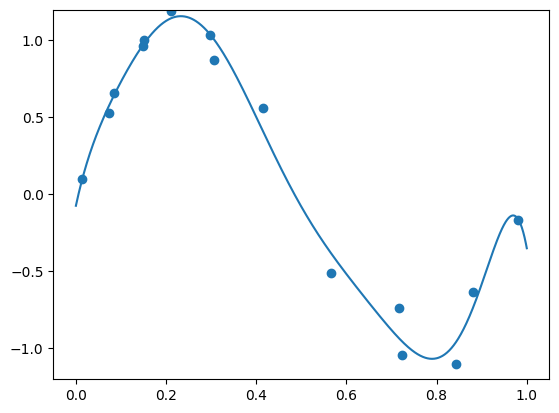

[[-7.32604968e-02]
 [ 1.36590427e+01]
 [-1.10701019e+02]
 [ 8.61648873e+02]
 [-4.00884878e+03]
 [ 9.79809715e+03]
 [-1.28420591e+04]
 [ 8.59928860e+03]
 [-2.31136071e+03]]
-----M =  10 ------lambda =  1


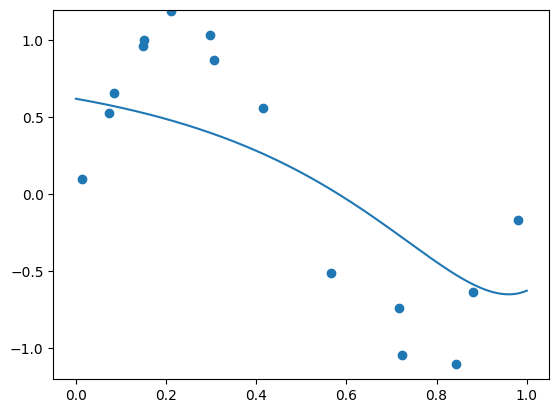

[[ 0.62183458]
 [-0.51849078]
 [-0.60072174]
 [-0.42910291]
 [-0.24931762]
 [-0.10444113]
 [ 0.00521559]
 [ 0.08676693]
 [ 0.14715033]
 [ 0.19180939]
 [ 0.2247773 ]]
-----M =  10 ------lambda =  0.1


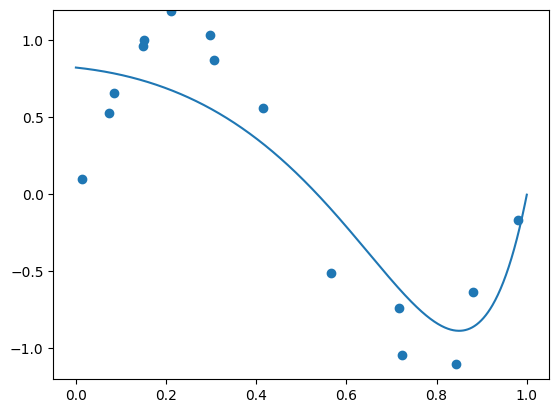

[[ 0.82414355]
 [-0.30999263]
 [-1.54751586]
 [-1.17622886]
 [-0.5895299 ]
 [-0.10507285]
 [ 0.24359205]
 [ 0.48154409]
 [ 0.63871792]
 [ 0.73906513]
 [ 0.79995356]]
-----M =  10 ------lambda =  0.001


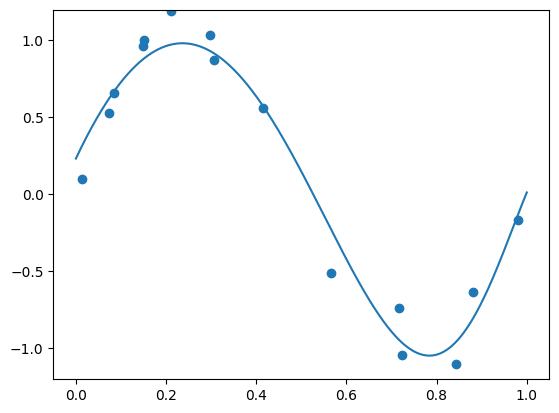

[[  0.23313257]
 [  6.21311536]
 [-12.06376818]
 [ -4.28169145]
 [  2.12438518]
 [  4.5183157 ]
 [  4.3105449 ]
 [  2.80931284]
 [  0.79813011]
 [ -1.31415635]
 [ -3.33414791]]
-----M =  10 ------lambda =  1e-06


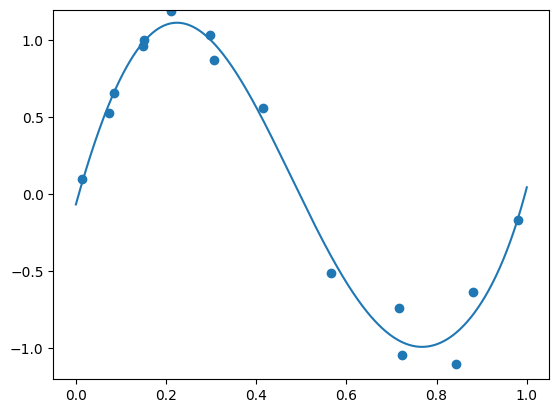

[[ -0.06453723]
 [ 10.55301452]
 [-22.06086827]
 [-13.85040833]
 [ 28.2376301 ]
 [ 15.69013902]
 [ -7.92899001]
 [-14.6876352 ]
 [ -5.08776452]
 [  6.39649273]
 [  2.84946497]]
-----M =  10 ------lambda =  1e-12


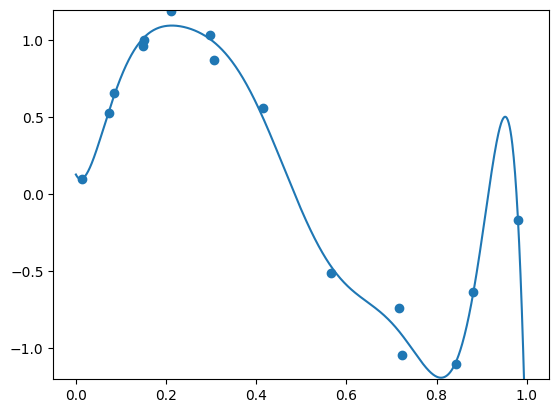

[[ 1.29585400e-01]
 [-5.80004671e+00]
 [ 3.14937286e+02]
 [-3.01560706e+03]
 [ 1.37486081e+04]
 [-3.34237639e+04]
 [ 3.86069649e+04]
 [-2.44633263e+03]
 [-4.28909200e+04]
 [ 4.20707982e+04]
 [-1.29609215e+04]]
-----M =  12 ------lambda =  1


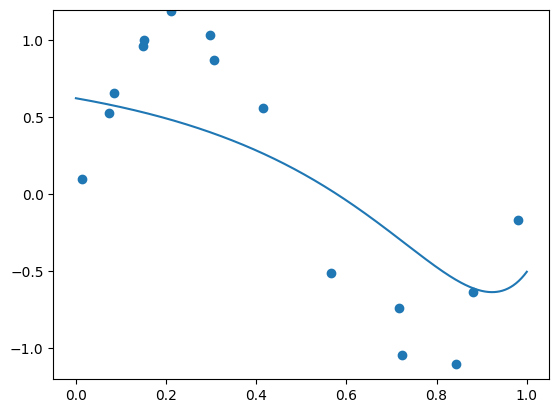

[[ 0.62495525]
 [-0.51265281]
 [-0.60717101]
 [-0.44670239]
 [-0.27566971]
 [-0.1374619 ]
 [-0.03283928]
 [ 0.04493487]
 [ 0.10250745]
 [ 0.14510287]
 [ 0.17658902]
 [ 0.19978535]
 [ 0.21674722]]
-----M =  12 ------lambda =  0.1


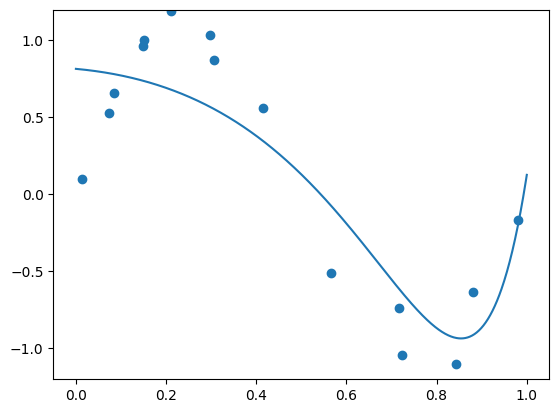

[[ 0.81576904]
 [-0.26961702]
 [-1.48531875]
 [-1.14742793]
 [-0.61184747]
 [-0.18039459]
 [ 0.11923869]
 [ 0.31400449]
 [ 0.43411845]
 [ 0.50318621]
 [ 0.53800621]
 [ 0.55016289]
 [ 0.54756128]]
-----M =  12 ------lambda =  0.001


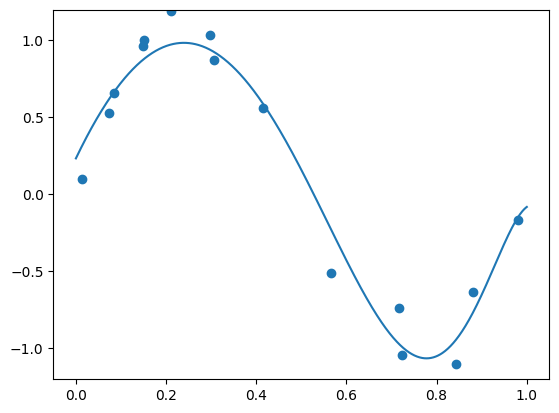

[[  0.23425048]
 [  6.11086742]
 [-11.54277271]
 [ -4.35100579]
 [  1.49489245]
 [  3.76061766]
 [  3.84817089]
 [  2.94717571]
 [  1.71939034]
 [  0.47737215]
 [ -0.65386996]
 [ -1.64000753]
 [ -2.48596316]]
-----M =  12 ------lambda =  1e-06


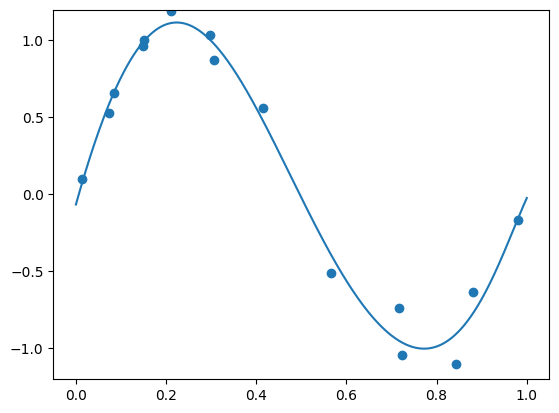

[[ -0.06543312]
 [ 10.50626935]
 [-21.00774473]
 [-18.76888998]
 [ 33.23481493]
 [ 21.46751963]
 [ -9.70635923]
 [-23.70804849]
 [-14.5297178 ]
 [  6.07362615]
 [ 21.14176216]
 [ 15.6909016 ]
 [-20.35146455]]
-----M =  12 ------lambda =  1e-12


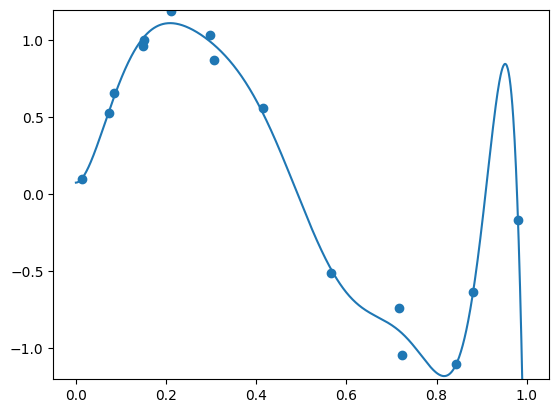

[[ 7.69235576e-02]
 [ 9.05871655e-02]
 [ 1.58002985e+02]
 [-1.25320200e+03]
 [ 3.73096779e+03]
 [-2.91353500e+03]
 [-7.84921014e+03]
 [ 1.45835077e+04]
 [ 3.32272716e+03]
 [-1.68230963e+04]
 [-4.80407237e+03]
 [ 2.13803623e+04]
 [-9.53553474e+03]]
-----M =  14 ------lambda =  1


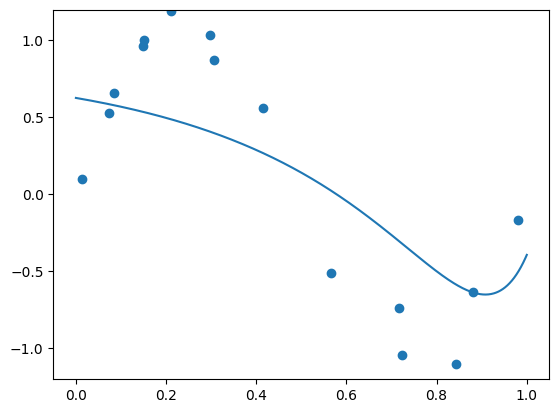

[[ 0.6269853 ]
 [-0.50563627]
 [-0.60860312]
 [-0.45662246]
 [-0.29261246]
 [-0.15997463]
 [-0.05971071]
 [ 0.01467543]
 [ 0.06963121]
 [ 0.11022325]
 [ 0.14019614]
 [ 0.16227289]
 [ 0.17843317]
 [ 0.1901247 ]
 [ 0.19841501]]
-----M =  14 ------lambda =  0.1


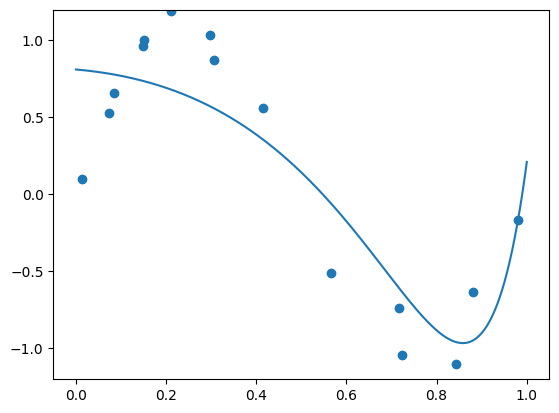

[[ 0.81168008]
 [-0.25554877]
 [-1.45006816]
 [-1.12099523]
 [-0.60681434]
 [-0.20046448]
 [ 0.0742759 ]
 [ 0.2460143 ]
 [ 0.34559013]
 [ 0.39674989]
 [ 0.41620599]
 [ 0.41535494]
 [ 0.40187468]
 [ 0.38090846]
 [ 0.35588412]]
-----M =  14 ------lambda =  0.001


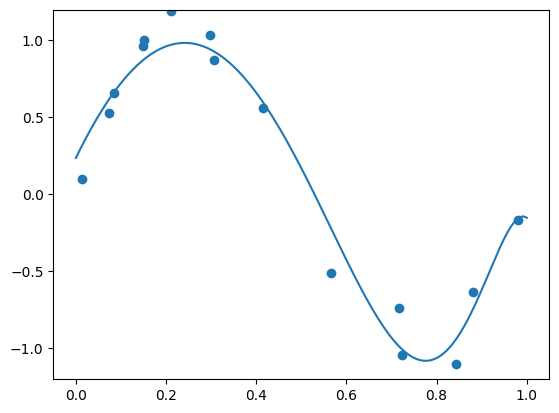

[[  0.2372589 ]
 [  6.02912314]
 [-11.26292626]
 [ -4.26344495]
 [  1.27031697]
 [  3.35838099]
 [  3.454777  ]
 [  2.720934  ]
 [  1.77096523]
 [  0.8728456 ]
 [  0.11639654]
 [ -0.48950725]
 [ -0.96705546]
 [ -1.34596898]
 [ -1.65357257]]
-----M =  14 ------lambda =  1e-06


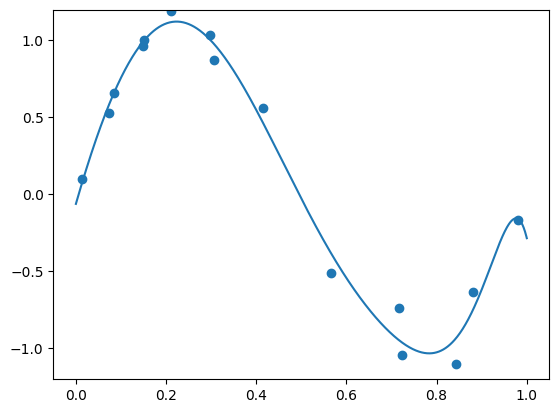

[[ -0.06108605]
 [ 10.21328548]
 [-17.75654439]
 [-28.78769872]
 [ 36.8434835 ]
 [ 34.04245001]
 [ -3.0085133 ]
 [-30.5521954 ]
 [-32.39900891]
 [-13.15204433]
 [ 13.51423519]
 [ 32.97089083]
 [ 33.73181743]
 [  8.77730939]
 [-44.66024711]]
-----M =  14 ------lambda =  1e-12


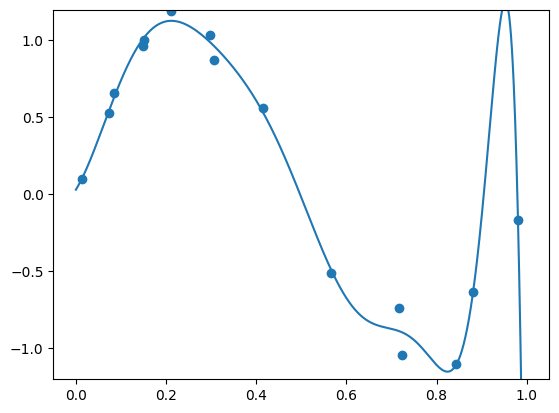

[[ 3.13760033e-02]
 [ 4.69970247e+00]
 [ 5.15894627e+01]
 [-2.50988713e+02]
 [-7.82628084e+02]
 [ 6.61450005e+03]
 [-1.33949172e+04]
 [ 5.00656292e+03]
 [ 1.10475886e+04]
 [-2.58591497e+03]
 [-1.05464625e+04]
 [-3.22088366e+03]
 [ 7.34206575e+03]
 [ 6.55356254e+03]
 [-5.84307466e+03]]
-----M =  16 ------lambda =  1


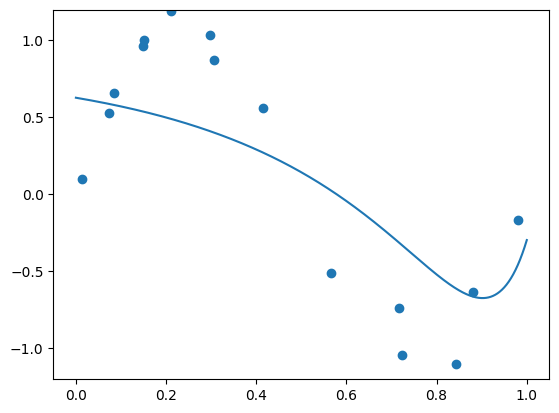

[[ 0.62826946]
 [-0.49894449]
 [-0.60760285]
 [-0.46190338]
 [-0.3033243 ]
 [-0.17513449]
 [-0.07844835]
 [-0.00691569]
 [ 0.04577894]
 [ 0.08459249]
 [ 0.11318074]
 [ 0.13419527]
 [ 0.14955824]
 [ 0.16067092]
 [ 0.16856309]
 [ 0.17399815]
 [ 0.17754705]]
-----M =  16 ------lambda =  0.1


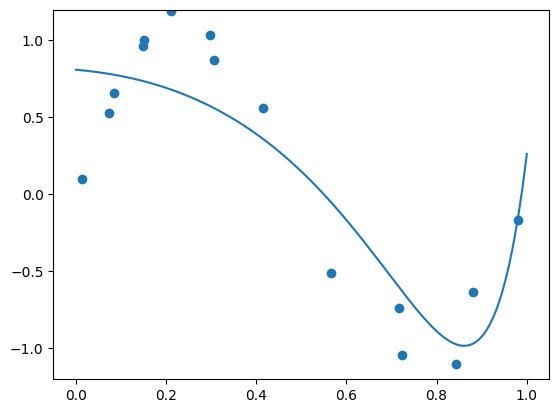

[[ 0.80984809]
 [-0.25176134]
 [-1.43212907]
 [-1.10383425]
 [-0.5979326 ]
 [-0.20283297]
 [ 0.05994623]
 [ 0.22011209]
 [ 0.30901919]
 [ 0.35062707]
 [ 0.36170197]
 [ 0.35361051]
 [ 0.3339584 ]
 [ 0.3077974 ]
 [ 0.27845764]
 [ 0.24810942]
 [ 0.21814057]]
-----M =  16 ------lambda =  0.001


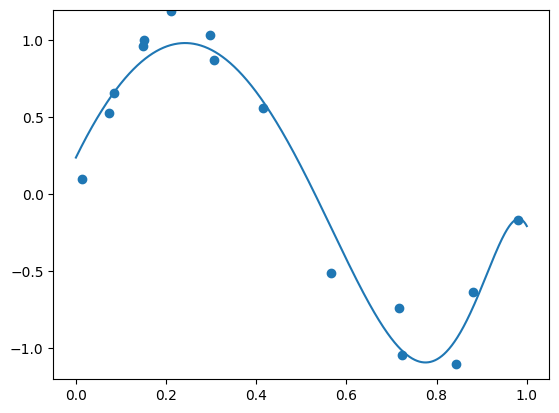

[[  0.23958309]
 [  5.98096326]
 [-11.13370727]
 [ -4.17648412]
 [  1.20975915]
 [  3.17961007]
 [  3.23306174]
 [  2.53126059]
 [  1.67187834]
 [  0.90382694]
 [  0.30025741]
 [ -0.1429159 ]
 [ -0.45725997]
 [ -0.67888854]
 [ -0.83920796]
 [ -0.96222185]
 [ -1.06471921]]
-----M =  16 ------lambda =  1e-06


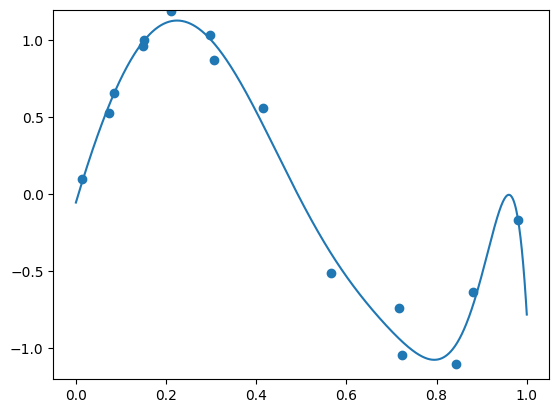

[[-5.24872602e-02]
 [ 9.83728186e+00]
 [-1.46138076e+01]
 [-3.52717915e+01]
 [ 3.33844672e+01]
 [ 4.23805148e+01]
 [ 9.16993320e+00]
 [-2.55381041e+01]
 [-4.00044009e+01]
 [-3.16150183e+01]
 [-8.45464412e+00]
 [ 1.80172723e+01]
 [ 3.73611978e+01]
 [ 4.20874326e+01]
 [ 2.80264679e+01]
 [-6.09839577e+00]
 [-5.93957460e+01]]
-----M =  16 ------lambda =  1e-12


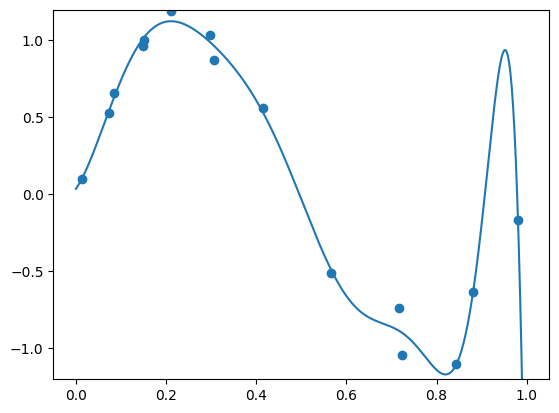

[[ 3.65444202e-02]
 [ 4.21042008e+00]
 [ 6.13694540e+01]
 [-3.21402662e+02]
 [-6.13972355e+02]
 [ 6.80144029e+03]
 [-1.46705164e+04]
 [ 5.84898186e+03]
 [ 1.27234107e+04]
 [-2.87015871e+03]
 [-1.29016121e+04]
 [-5.13365888e+03]
 [ 8.47570410e+03]
 [ 1.10224146e+04]
 [-1.24533764e+03]
 [-1.30547373e+04]
 [ 5.87071123e+03]]
-----M =  18 ------lambda =  1


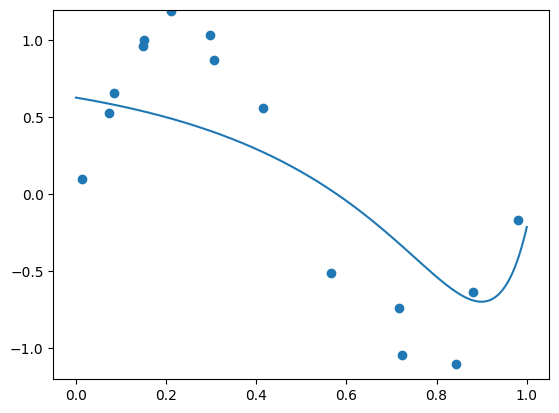

[[ 0.62907274]
 [-0.49310487]
 [-0.60559059]
 [-0.4645111 ]
 [-0.31008172]
 [-0.18538213]
 [-0.09156574]
 [-0.02236768]
 [ 0.02844157]
 [ 0.06574354]
 [ 0.09313072]
 [ 0.11320238]
 [ 0.12783756]
 [ 0.13840203]
 [ 0.14589622]
 [ 0.15105917]
 [ 0.15444155]
 [ 0.15645704]
 [ 0.15741883]]
-----M =  18 ------lambda =  0.1


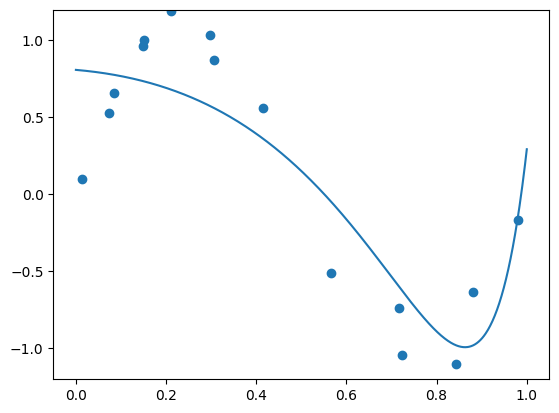

[[ 0.80910155]
 [-0.25135466]
 [-1.42385449]
 [-1.0944839 ]
 [-0.59143765]
 [-0.20101846]
 [ 0.05641524]
 [ 0.21118822]
 [ 0.2949771 ]
 [ 0.33189969]
 [ 0.33878813]
 [ 0.32702264]
 [ 0.30419329]
 [ 0.27532058]
 [ 0.24369593]
 [ 0.21144833]
 [ 0.17992454]
 [ 0.14994492]
 [ 0.12197638]]
-----M =  18 ------lambda =  0.001


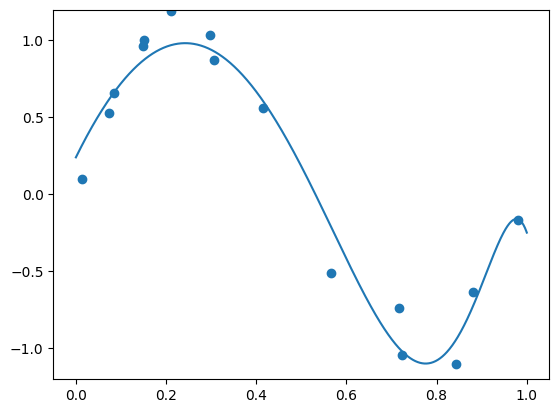

[[  0.24105114]
 [  5.95472677]
 [-11.07629402]
 [ -4.11673442]
 [  1.20235149]
 [  3.10400335]
 [  3.11900544]
 [  2.41414318]
 [  1.58207386]
 [  0.86363062]
 [  0.32407593]
 [ -0.04722849]
 [ -0.28684691]
 [ -0.43448061]
 [ -0.52397186]
 [ -0.58087247]
 [ -0.62286179]
 [ -0.66118582]
 [ -0.70227111]]
-----M =  18 ------lambda =  1e-06


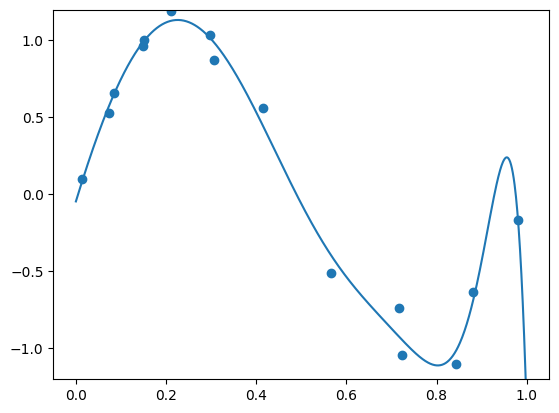

[[-4.51056537e-02]
 [ 9.60352821e+00]
 [-1.33510325e+01]
 [-3.50882484e+01]
 [ 2.61144668e+01]
 [ 4.24422704e+01]
 [ 1.83697385e+01]
 [-1.47235430e+01]
 [-3.56213030e+01]
 [-3.76466150e+01]
 [-2.39575201e+01]
 [-2.06067487e+00]
 [ 2.00400662e+01]
 [ 3.58685862e+01]
 [ 4.11758031e+01]
 [ 3.38737567e+01]
 [ 1.36217138e+01]
 [-1.86811836e+01]
 [-6.13656418e+01]]
-----M =  18 ------lambda =  1e-12


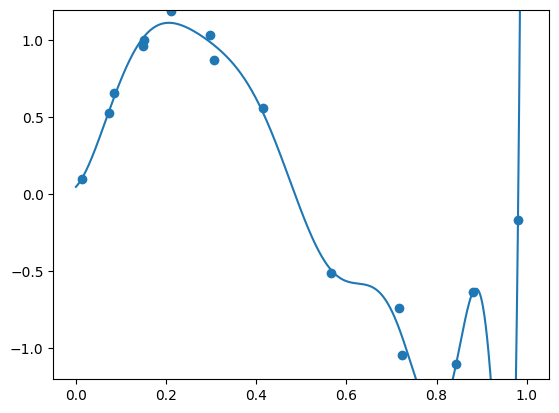

[[ 4.93428164e-02]
 [ 3.10402895e+00]
 [ 7.76664183e+01]
 [-3.44699893e+02]
 [-1.36693159e+03]
 [ 1.13380744e+04]
 [-2.31497196e+04]
 [ 6.13085105e+03]
 [ 2.27282844e+04]
 [ 1.86176328e+03]
 [-2.08655098e+04]
 [-1.89054548e+04]
 [ 2.40067458e+03]
 [ 2.13150645e+04]
 [ 2.12335427e+04]
 [ 1.44704139e+03]
 [-2.24964881e+04]
 [-2.47741160e+04]
 [ 2.33771816e+04]]
-----M =  20 ------lambda =  1


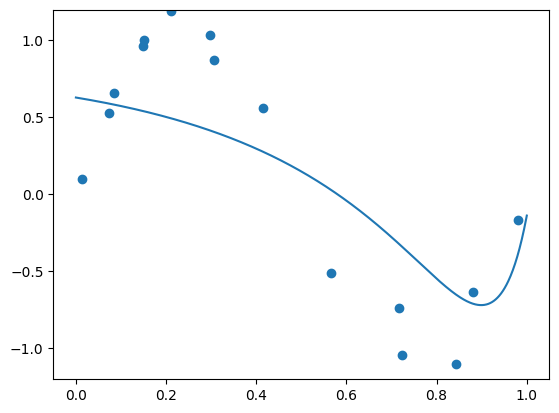

[[ 0.62957326]
 [-0.48820406]
 [-0.60328411]
 [-0.46562062]
 [-0.31436388]
 [-0.19239318]
 [-0.10086119]
 [-0.03355097]
 [ 0.01571124]
 [ 0.05175507]
 [ 0.07812775]
 [ 0.09739016]
 [ 0.11138903]
 [ 0.12146301]
 [ 0.12858975]
 [ 0.13348922]
 [ 0.13669594]
 [ 0.13860999]
 [ 0.13953305]
 [ 0.13969429]
 [ 0.13926891]]
-----M =  20 ------lambda =  0.1


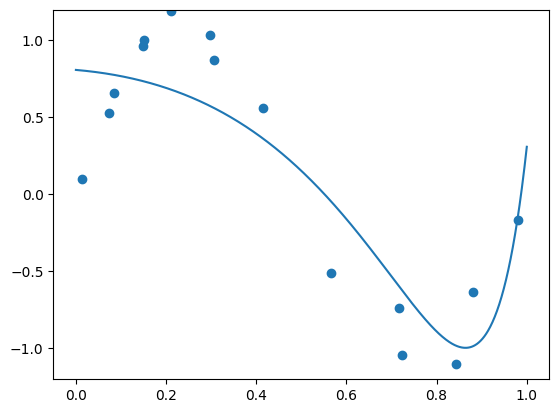

[[ 0.808843  ]
 [-0.25167861]
 [-1.42059496]
 [-1.09029119]
 [-0.58803873]
 [-0.19930218]
 [ 0.05606186]
 [ 0.20866336]
 [ 0.29033774]
 [ 0.32528778]
 [ 0.33038708]
 [ 0.31703144]
 [ 0.2928113 ]
 [ 0.26273888]
 [ 0.2300926 ]
 [ 0.19698621]
 [ 0.1647506 ]
 [ 0.13419046]
 [ 0.10575783]
 [ 0.07966981]
 [ 0.05598898]]
-----M =  20 ------lambda =  0.001


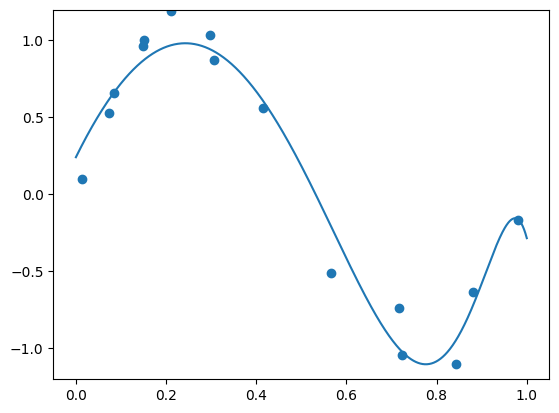

[[  0.24196233]
 [  5.94007644]
 [-11.05008183]
 [ -4.07793788]
 [  1.20950984]
 [  3.07157931]
 [  3.05894818]
 [  2.3441574 ]
 [  1.51877637]
 [  0.82007885]
 [  0.30937123]
 [ -0.02749423]
 [ -0.22988802]
 [ -0.33961382]
 [ -0.39200873]
 [ -0.41363245]
 [ -0.42279937]
 [ -0.4311144 ]
 [ -0.44516425]
 [ -0.46801509]
 [ -0.50040905]]
-----M =  20 ------lambda =  1e-06


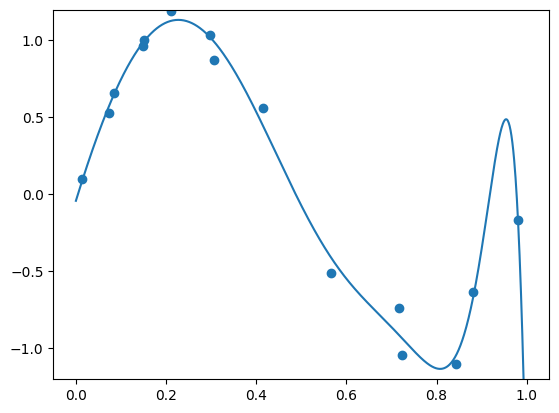

[[-4.11717930e-02]
 [ 9.54066527e+00]
 [-1.36673535e+01]
 [-3.10767892e+01]
 [ 1.94219142e+01]
 [ 3.77760078e+01]
 [ 2.22488484e+01]
 [-5.19171391e+00]
 [-2.68169949e+01]
 [-3.48011110e+01]
 [-2.92512927e+01]
 [-1.45420434e+01]
 [ 3.70704006e+00]
 [ 2.04480332e+01]
 [ 3.19994963e+01]
 [ 3.61863504e+01]
 [ 3.21429540e+01]
 [ 1.99914403e+01]
 [ 5.13883106e-01]
 [-2.51270744e+01]
 [-5.56020375e+01]]
-----M =  20 ------lambda =  1e-12


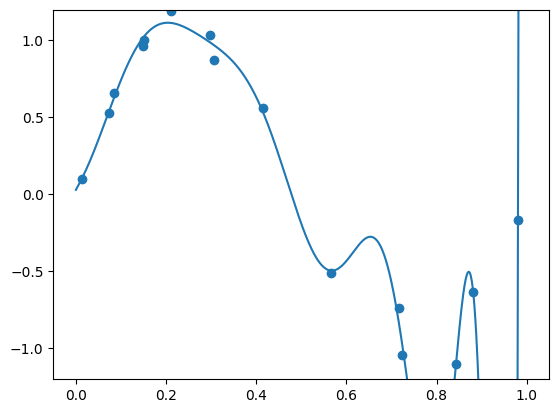

[[ 3.02185900e-02]
 [ 5.19408419e+00]
 [ 2.19912773e+01]
 [ 2.79412601e+02]
 [-4.77410908e+03]
 [ 2.02459956e+04]
 [-3.09393988e+04]
 [-8.18722173e+02]
 [ 2.98973586e+04]
 [ 1.42411796e+04]
 [-1.80020347e+04]
 [-3.03167855e+04]
 [-1.53245169e+04]
 [ 1.11795114e+04]
 [ 2.91729682e+04]
 [ 2.73309430e+04]
 [ 7.13807991e+03]
 [-1.95022373e+04]
 [-3.51323046e+04]
 [-2.15139749e+04]
 [ 3.68589615e+04]]


In [ ]:
# Completar con lo requerido.
M_ = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
lamda = [1, 0.1, 1e-3, 1e-6, 1e-12]

for m in M_:
  for l in lamda:
    print("-----M = ", m, "------lambda = ", l)
    Lin_Reg = Linear_Regression_R(M=m, lam=l) # Inicialización del modelo.
    Lin_Reg.fit(X, t) # El entrenamiento del modelo.
    pred = Lin_Reg.predict(X_test)
    plt.plot(X_test, pred)
    plt.scatter(X, t)
    plt.ylim([-1.2,1.2])
    plt.show()
    print(Lin_Reg.w)

# Actividad 4: Regularización por norma $L_1$, $P=1$

* Consultar en qué consiste la norma $L_1$
* Construir un modelo de regresión lineal con regularización $L_1$.
* Repetir los experimentos planteados en la actividad 3 y realizar los mismos análisis.

In [ ]:
# Completar con lo requerido

class LassoRegressionGD:
    def __init__(self, M=10, lam=1, eta=0.1, max_iter=10000):
        self.M = M  # Degree of polynomial features
        self.lam = lam  # Regularization parameter
        self.eta = eta  # Learning rate
        self.max_iter = max_iter  # Maximum number of iterations
        self.poly = PolynomialFeatures(self.M)  # Polynomial feature transformer
        self.w = np.random.normal(0,1,(self.M+1,1)) # Inicializamos los parámetros w.

    def fit(self, X, t):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        X_tilde = self.poly.fit_transform(X)
        n = X_tilde.shape[0]  # Number of samples and features



        for iteration in range(self.max_iter):
            y_pred = X_tilde @ self.w
            # gradient
            gradient = -(1/n) * (X_tilde.T @ (t - y_pred)) + self.lam * np.sign(self.w)
            # weights
            self.w -= self.eta * gradient



        return self

    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        X_tilde = self.poly.transform(X)
        y = X_tilde @ self.w
        return y



-----M =  2 ------lambda =  1


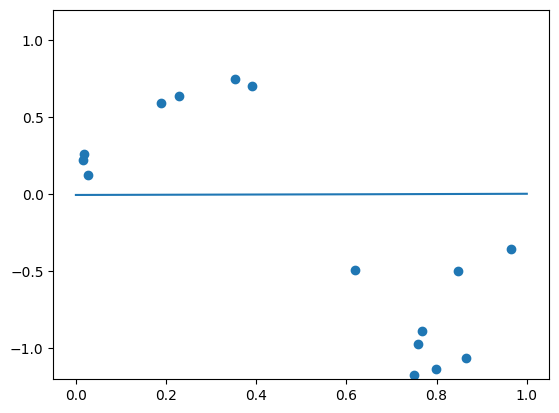

[[-0.0031058 ]
 [ 0.00600305]
 [ 0.00170367]]
-----M =  2 ------lambda =  0.1


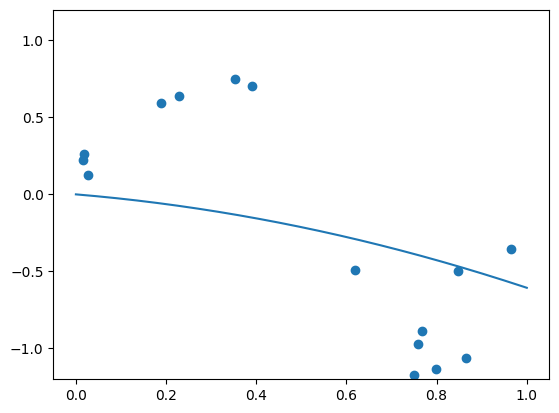

[[ 0.00074625]
 [-0.24455748]
 [-0.36213953]]
-----M =  2 ------lambda =  0.001


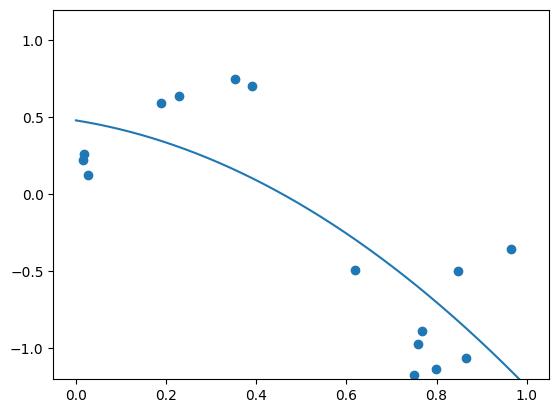

[[ 0.48113039]
 [-0.46633159]
 [-1.26333448]]
-----M =  2 ------lambda =  1e-06


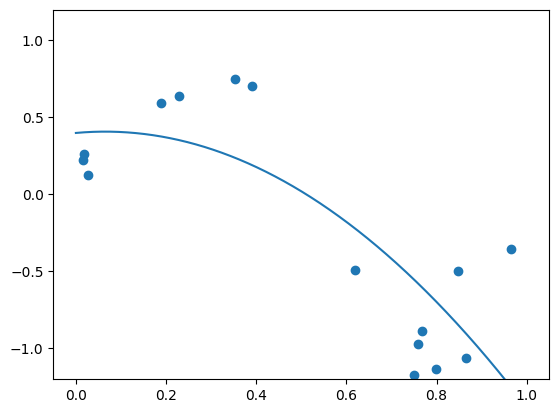

[[ 0.39952055]
 [ 0.26535651]
 [-2.04698664]]
-----M =  2 ------lambda =  1e-12


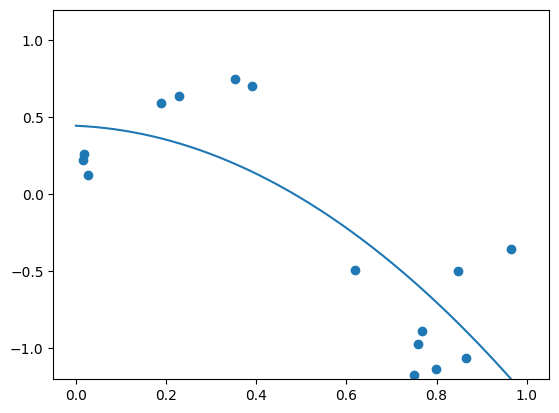

[[ 0.44627138]
 [-0.12429106]
 [-1.63717853]]
-----M =  4 ------lambda =  1


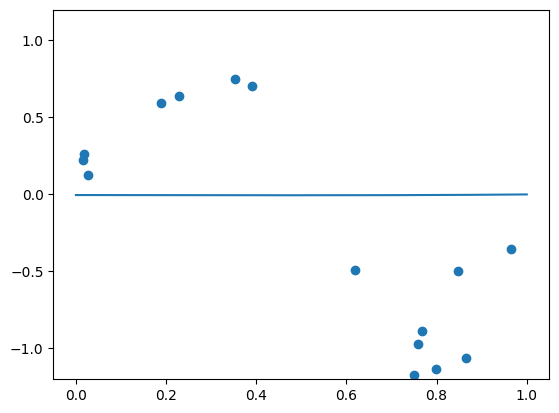

[[-0.00369031]
 [-0.00433271]
 [ 0.00228369]
 [-0.00199864]
 [ 0.00804766]]
-----M =  4 ------lambda =  0.1


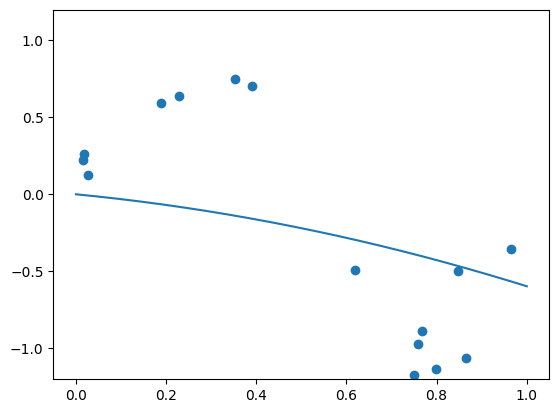

[[ 0.00125431]
 [-0.28398093]
 [-0.31147852]
 [-0.00145672]
 [-0.00047103]]
-----M =  4 ------lambda =  0.001


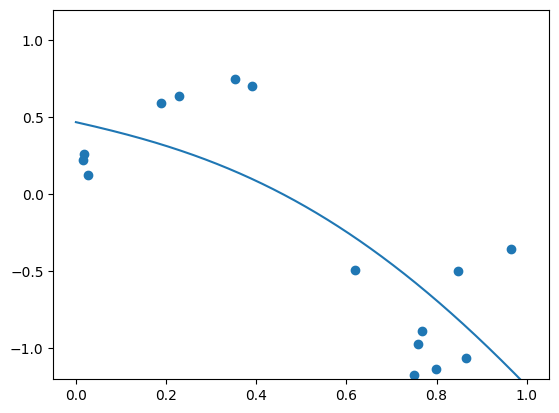

[[ 0.46965383]
 [-0.65959668]
 [-0.33966797]
 [-1.17888153]
 [ 0.46494936]]
-----M =  4 ------lambda =  1e-06


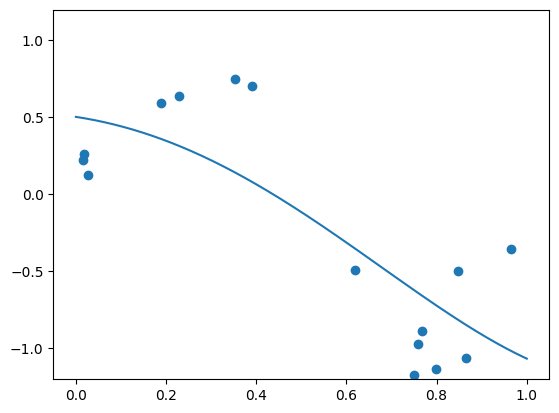

[[ 0.50395243]
 [-0.44701191]
 [-1.60881359]
 [-0.36698578]
 [ 0.85289188]]
-----M =  4 ------lambda =  1e-12


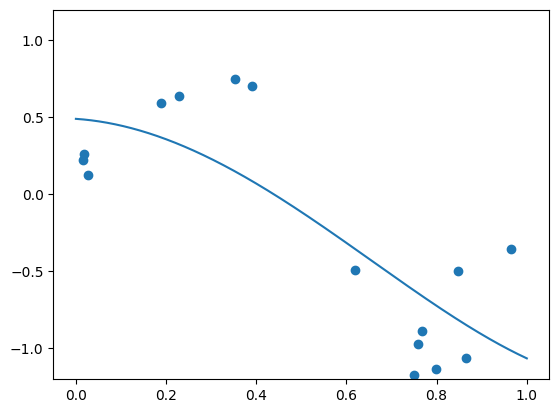

[[ 0.49112339]
 [-0.19833685]
 [-2.47386647]
 [ 0.68595748]
 [ 0.43093408]]
-----M =  6 ------lambda =  1


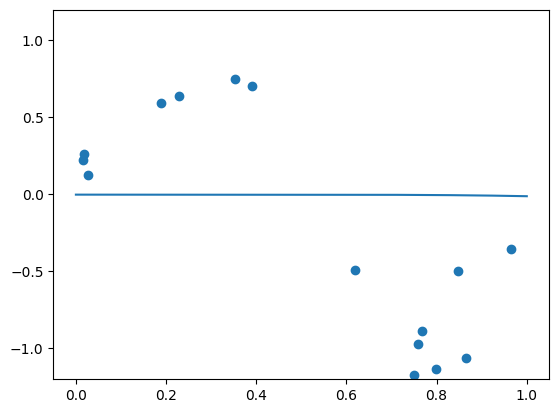

[[-0.00104951]
 [-0.0008    ]
 [ 0.00144178]
 [ 0.00464434]
 [-0.01169138]
 [ 0.0072841 ]
 [-0.01112169]]
-----M =  6 ------lambda =  0.1


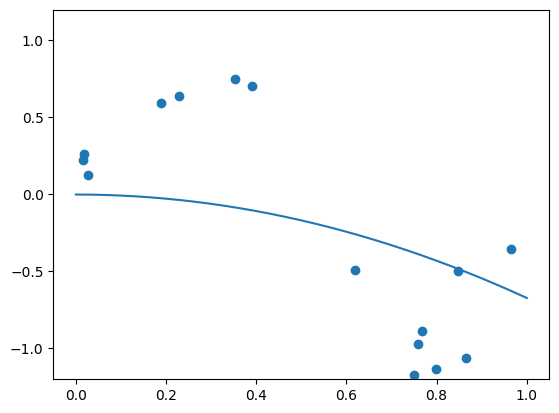

[[-3.43951931e-04]
 [-1.24694337e-04]
 [-6.70949828e-01]
 [-4.43910800e-04]
 [-9.06069360e-04]
 [ 3.60043205e-04]
 [ 3.64892887e-04]]
-----M =  6 ------lambda =  0.001


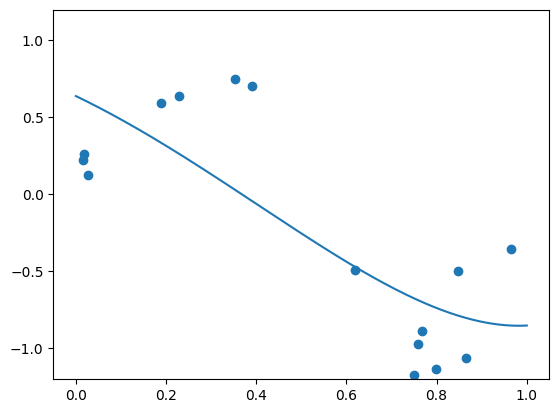

[[ 0.63904719]
 [-1.40863057]
 [-1.17159739]
 [ 0.6214608 ]
 [ 0.53627073]
 [-0.30262684]
 [ 0.23511209]]
-----M =  6 ------lambda =  1e-06


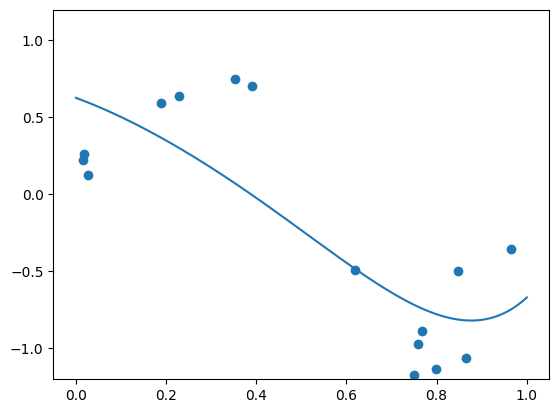

[[ 0.62758841]
 [-1.08211645]
 [-1.71218153]
 [ 1.1941591 ]
 [-1.05713256]
 [ 0.31963651]
 [ 1.04124299]]
-----M =  6 ------lambda =  1e-12


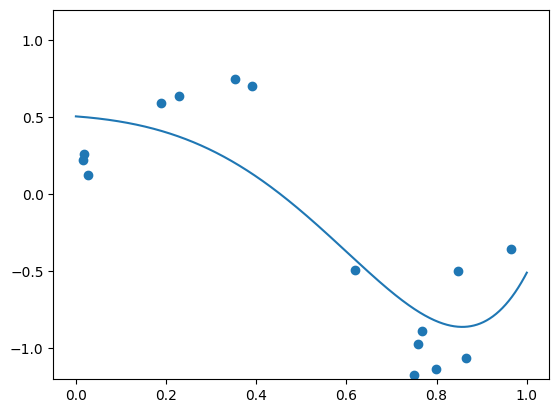

[[ 0.50715453]
 [-0.22012862]
 [-1.06181637]
 [-1.96125268]
 [-1.46383085]
 [ 2.46333536]
 [ 1.2287723 ]]
-----M =  8 ------lambda =  1


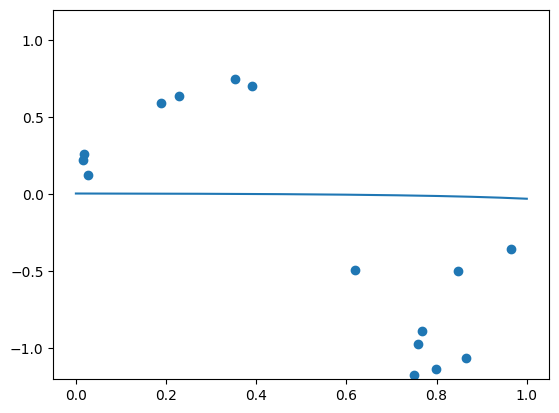

[[ 0.0062415 ]
 [-0.0033313 ]
 [-0.00586926]
 [-0.01154161]
 [-0.00898376]
 [ 0.0051845 ]
 [-0.00187493]
 [ 0.00314943]
 [-0.01067892]]
-----M =  8 ------lambda =  0.1


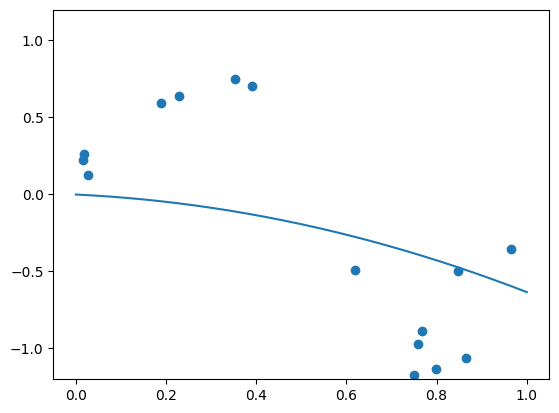

[[-4.24780195e-04]
 [-1.37859218e-01]
 [-4.93959124e-01]
 [-6.52210356e-04]
 [-1.21920753e-03]
 [ 3.58764505e-04]
 [ 6.83678235e-05]
 [-7.81952684e-04]
 [ 4.80022035e-04]]
-----M =  8 ------lambda =  0.001


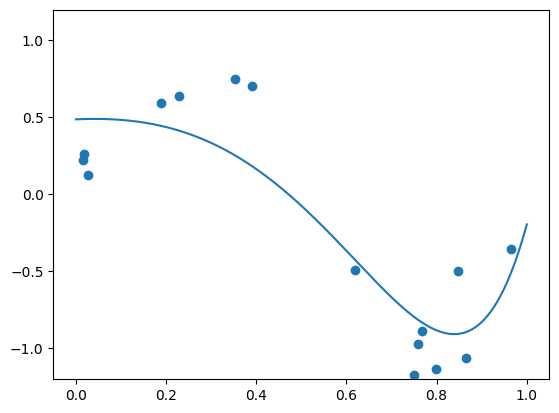

[[ 0.48794828]
 [ 0.1296527 ]
 [-1.39978492]
 [-2.54027487]
 [ 0.03867723]
 [ 0.76099415]
 [ 0.02910793]
 [ 1.52131917]
 [ 0.77825923]]
-----M =  8 ------lambda =  1e-06


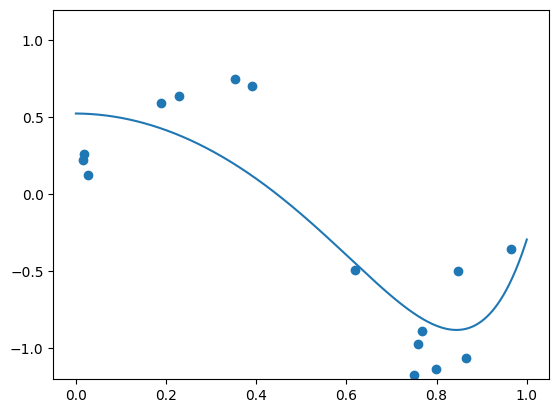

[[ 0.52569147]
 [-0.01461656]
 [-2.67744527]
 [ 0.31248359]
 [-0.44853101]
 [-0.2379406 ]
 [ 1.21519268]
 [-1.03613219]
 [ 2.06889866]]
-----M =  8 ------lambda =  1e-12


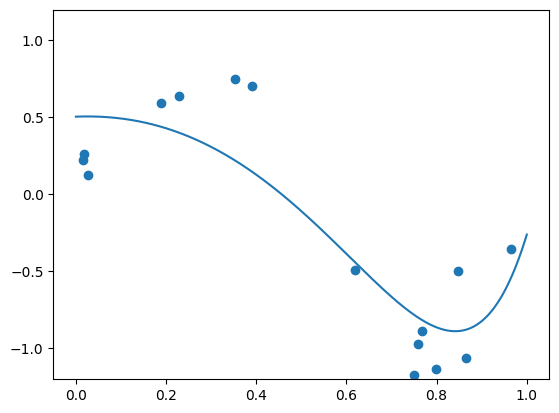

[[ 0.50524821]
 [ 0.11399405]
 [-2.16224819]
 [-1.70195113]
 [ 1.33472162]
 [-0.45432416]
 [ 0.41242242]
 [ 0.14434705]
 [ 1.54749221]]
-----M =  10 ------lambda =  1


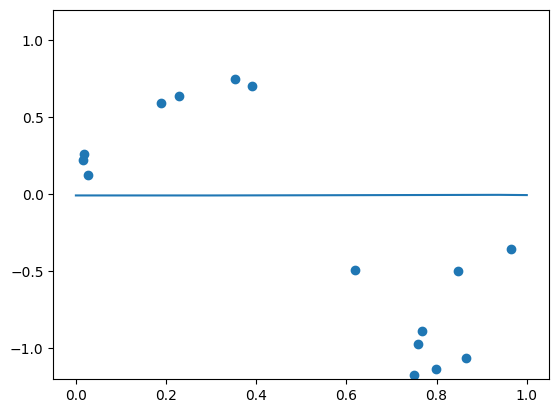

[[-0.00624898]
 [-0.00277497]
 [ 0.00736191]
 [ 0.00190711]
 [ 0.00606772]
 [-0.00531958]
 [-0.00100168]
 [ 0.00848887]
 [-0.01068669]
 [ 0.00563505]
 [-0.00734289]]
-----M =  10 ------lambda =  0.1


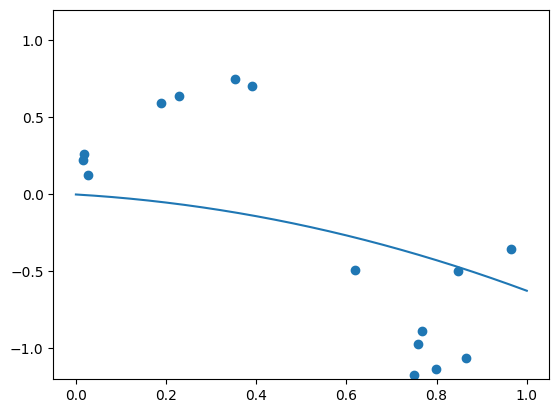

[[-3.90475258e-05]
 [-1.71381482e-01]
 [-4.51852260e-01]
 [-1.38229911e-03]
 [ 1.60115484e-04]
 [ 3.94348320e-04]
 [-5.64996516e-04]
 [-1.55390178e-04]
 [-5.80790540e-04]
 [-2.48464715e-04]
 [ 4.86284983e-04]]
-----M =  10 ------lambda =  0.001


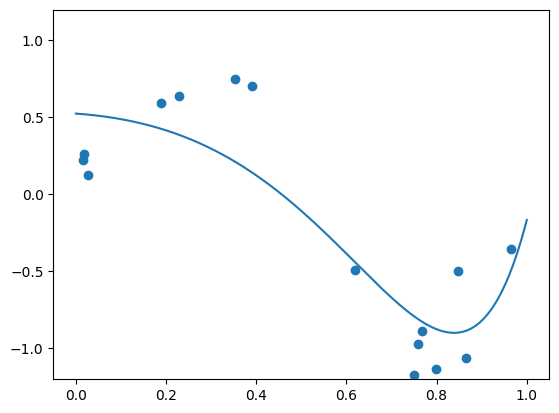

[[ 0.52511973]
 [-0.20151028]
 [-1.47336683]
 [-0.88591401]
 [-1.76716447]
 [ 1.24019501]
 [ 0.70803604]
 [ 0.80128934]
 [ 0.65856967]
 [-0.50931415]
 [ 0.73846395]]
-----M =  10 ------lambda =  1e-06


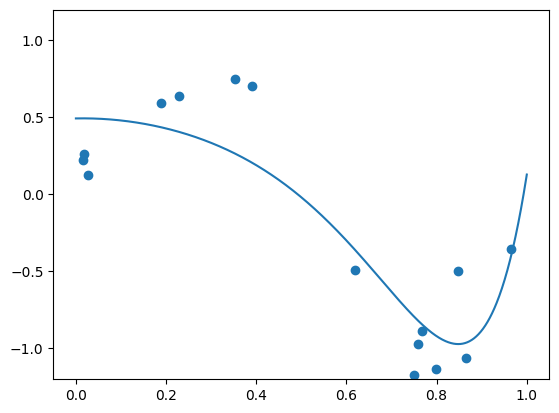

[[ 0.49380842]
 [ 0.06228473]
 [-1.99749125]
 [ 0.72350902]
 [-1.99371739]
 [-0.28465741]
 [-0.6945938 ]
 [ 0.17931326]
 [ 1.46981996]
 [ 0.70230806]
 [ 1.46891288]]
-----M =  10 ------lambda =  1e-12


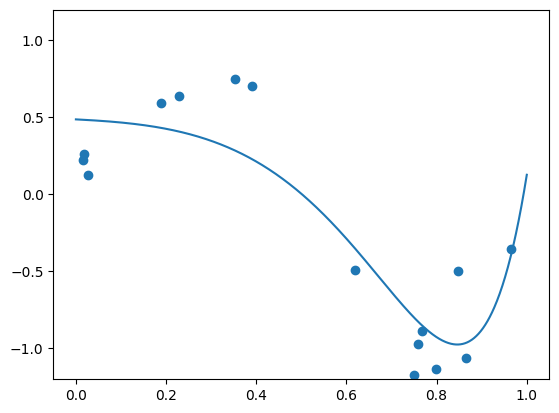

[[ 0.48765923]
 [-0.14935522]
 [-0.31684787]
 [-2.15825763]
 [-0.7066366 ]
 [-0.97841669]
 [ 0.04242111]
 [ 1.0635009 ]
 [ 0.88796163]
 [ 1.11745289]
 [ 0.8384863 ]]
-----M =  12 ------lambda =  1


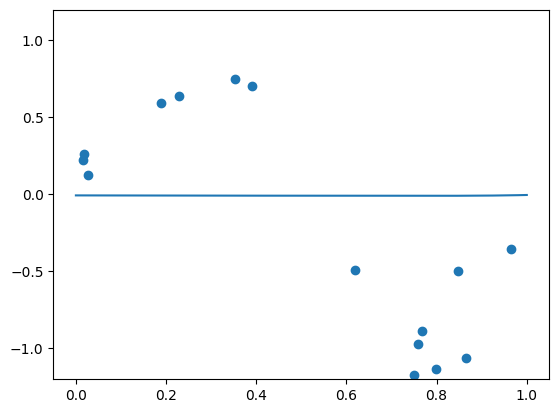

[[-0.00596781]
 [-0.00603964]
 [ 0.00426164]
 [ 0.00200612]
 [-0.00457446]
 [-0.00070877]
 [-0.00643804]
 [ 0.00672238]
 [ 0.00204413]
 [ 0.00447654]
 [-0.00497807]
 [ 0.00023876]
 [ 0.00568464]]
-----M =  12 ------lambda =  0.1


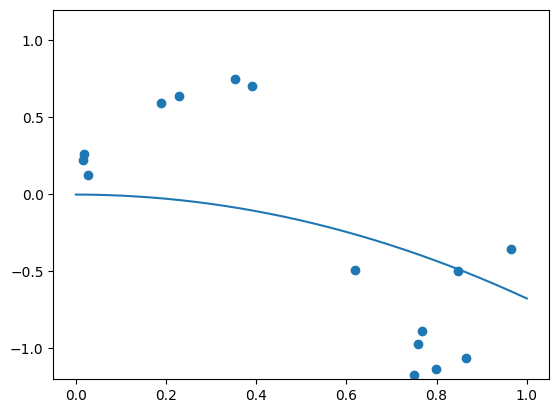

[[-5.65409333e-04]
 [-1.52047082e-03]
 [-6.70620844e-01]
 [-1.30233116e-03]
 [-8.67890161e-04]
 [-4.46627994e-04]
 [-1.25431957e-04]
 [ 2.76103322e-04]
 [-4.56199455e-04]
 [-4.73997266e-04]
 [ 8.74661218e-04]
 [ 6.71035816e-04]
 [-7.50830253e-04]]
-----M =  12 ------lambda =  0.001


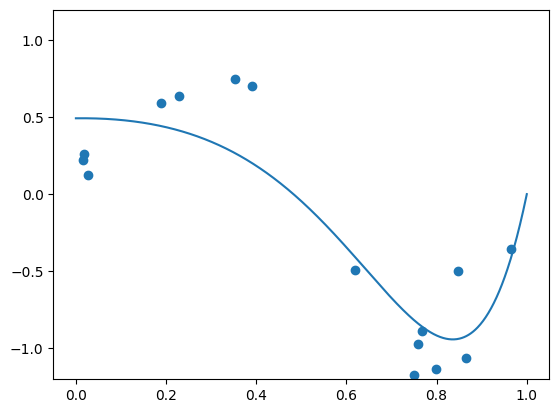

[[ 0.49472198]
 [ 0.03856135]
 [-1.3724319 ]
 [-0.95139808]
 [-1.96071361]
 [ 0.6430562 ]
 [-1.13122631]
 [ 1.851802  ]
 [ 2.54909835]
 [ 0.0912265 ]
 [ 0.00991523]
 [ 0.09395019]
 [-0.35435143]]
-----M =  12 ------lambda =  1e-06


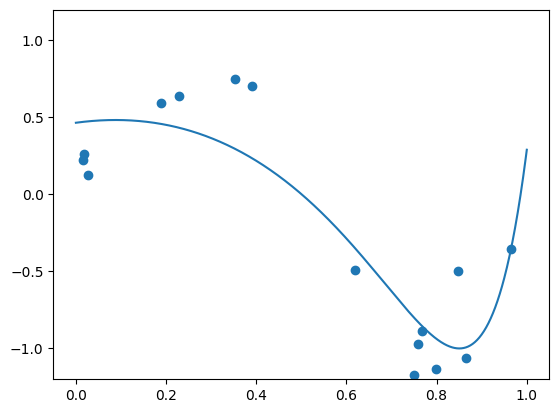

[[ 0.4657449 ]
 [ 0.39703394]
 [-2.11709721]
 [-1.06711731]
 [ 0.18487988]
 [-0.21475431]
 [-0.19659026]
 [-0.60934704]
 [ 0.49523469]
 [ 0.20916266]
 [ 1.15577824]
 [ 0.53500379]
 [ 1.05256531]]
-----M =  12 ------lambda =  1e-12


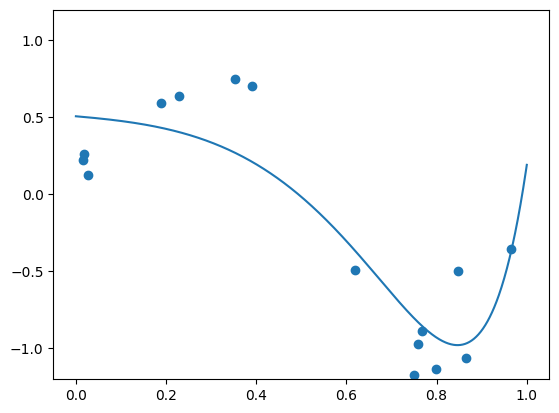

[[ 0.50784199]
 [-0.25155727]
 [-0.31978441]
 [-2.19427446]
 [-0.59346082]
 [-1.0066504 ]
 [ 1.16476268]
 [ 0.67159123]
 [-0.44598318]
 [ 1.45097092]
 [ 0.52260899]
 [-0.25823598]
 [ 0.94463211]]
-----M =  14 ------lambda =  1


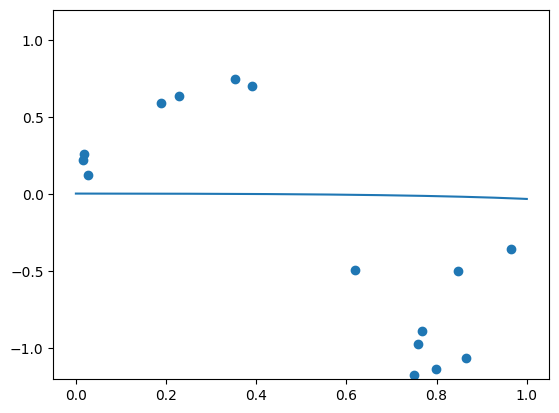

[[ 0.00584013]
 [-0.00133149]
 [-0.00885157]
 [-0.00752503]
 [-0.01022634]
 [-0.00982777]
 [ 0.00838817]
 [-0.00310192]
 [-0.00056388]
 [-0.00314114]
 [-0.00059927]
 [ 0.00908586]
 [-0.00881886]
 [ 0.00908151]
 [-0.00744104]]
-----M =  14 ------lambda =  0.1


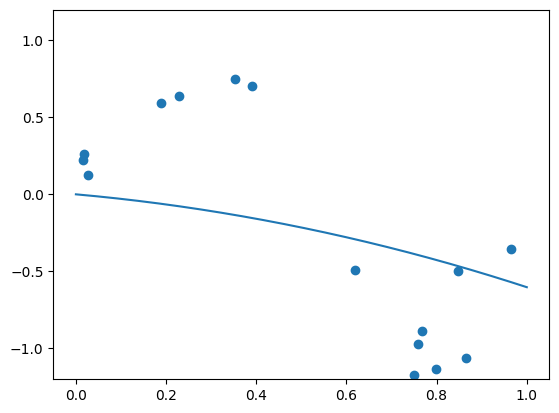

[[ 9.97108045e-04]
 [-2.60736079e-01]
 [-3.39745708e-01]
 [-5.79859339e-04]
 [ 6.90767172e-05]
 [ 1.39070621e-04]
 [ 1.42917218e-04]
 [-1.20637053e-03]
 [-1.03503199e-03]
 [-8.69791847e-04]
 [-1.04436813e-03]
 [ 8.29618899e-04]
 [ 7.17654072e-04]
 [ 2.69854448e-04]
 [-1.04134059e-05]]
-----M =  14 ------lambda =  0.001


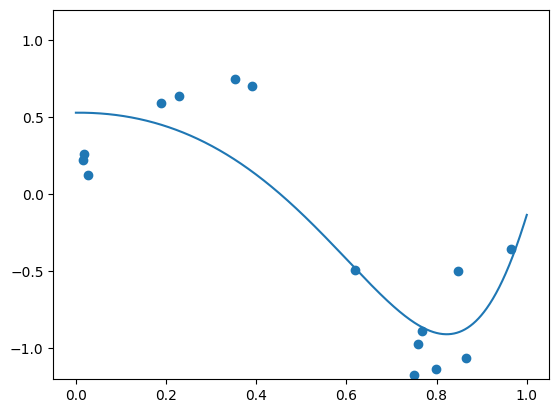

[[ 0.53097587]
 [ 0.03283339]
 [-2.16604768]
 [-0.90783631]
 [-0.61675882]
 [-0.17634371]
 [ 1.03072543]
 [ 1.1812611 ]
 [ 1.14305535]
 [-0.15620193]
 [-0.39316924]
 [ 0.11733911]
 [ 1.11798783]
 [ 0.88665258]
 [-1.75702812]]
-----M =  14 ------lambda =  1e-06


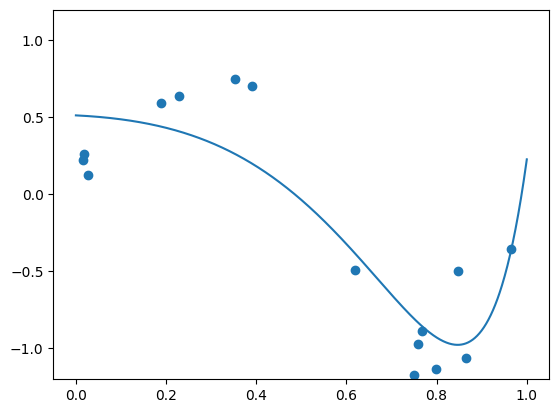

[[ 0.51366302]
 [-0.14384919]
 [-0.97892346]
 [-1.33809807]
 [-1.38110625]
 [ 0.06899975]
 [ 0.55351237]
 [ 1.06820064]
 [ 0.96233992]
 [-1.41592208]
 [ 0.59356475]
 [ 1.67421665]
 [-1.4229253 ]
 [ 1.11582431]
 [ 0.35859154]]
-----M =  14 ------lambda =  1e-12


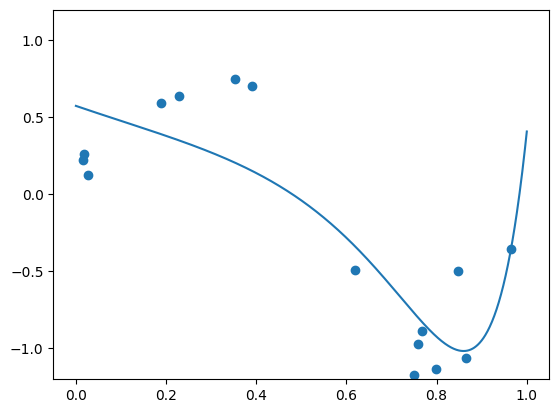

[[ 0.57535225]
 [-1.00195505]
 [ 0.39276048]
 [-1.01975028]
 [-1.07086489]
 [-0.57128096]
 [ 0.45995442]
 [-1.36472054]
 [ 0.81075475]
 [ 0.49492321]
 [-0.53604999]
 [ 2.02832837]
 [-1.04868153]
 [ 1.62123137]
 [ 0.63898748]]
-----M =  16 ------lambda =  1


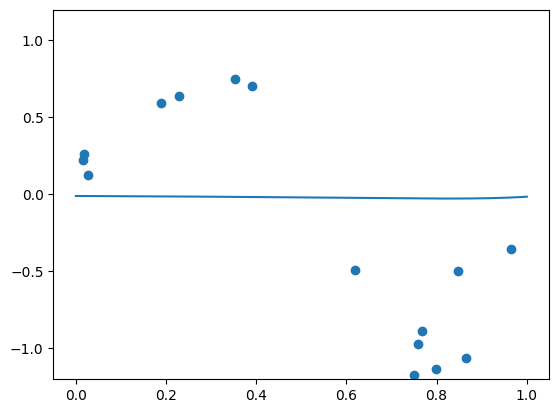

[[-0.00979042]
 [-0.01249435]
 [-0.00713703]
 [-0.0080559 ]
 [-0.00812473]
 [ 0.00689215]
 [-0.00161538]
 [ 0.00881615]
 [ 0.00319541]
 [ 0.00138444]
 [-0.00122485]
 [ 0.00870635]
 [-0.0015106 ]
 [ 0.00507288]
 [ 0.00870974]
 [-0.00626217]
 [-0.00094106]]
-----M =  16 ------lambda =  0.1


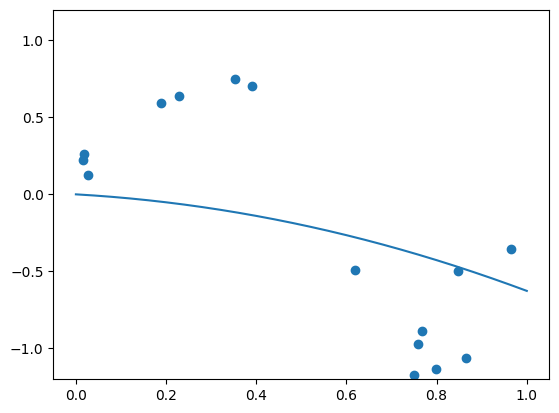

[[ 8.77958747e-04]
 [-1.66574661e-01]
 [-4.57855581e-01]
 [-1.41349997e-03]
 [ 2.07218057e-04]
 [-3.93398723e-04]
 [-6.29879569e-04]
 [-8.80127476e-04]
 [ 4.19184452e-04]
 [-9.80423135e-04]
 [-2.30126062e-05]
 [ 3.70241380e-04]
 [-8.89898982e-04]
 [ 6.91320530e-04]
 [ 7.67234776e-04]
 [ 6.85183279e-05]
 [ 2.03738583e-04]]
-----M =  16 ------lambda =  0.001


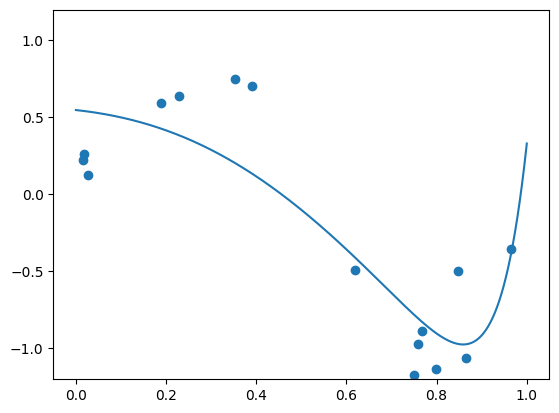

[[ 0.54826838]
 [-0.31781371]
 [-1.4612496 ]
 [-1.30527432]
 [ 0.12171515]
 [ 1.13911137]
 [-0.56094164]
 [ 0.56715268]
 [ 1.0153035 ]
 [-1.4286122 ]
 [-1.12906266]
 [ 0.31664571]
 [ 0.76132607]
 [ 0.0909505 ]
 [ 0.70768307]
 [ 0.42837898]
 [ 0.83730146]]
-----M =  16 ------lambda =  1e-06


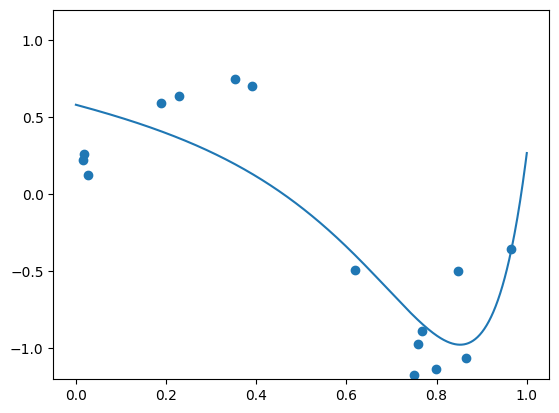

[[ 0.5826539 ]
 [-0.79028285]
 [-0.42338764]
 [-1.13266756]
 [-0.00821028]
 [-0.8819065 ]
 [-0.08965712]
 [ 0.38968141]
 [ 0.39125228]
 [ 0.26755678]
 [-0.13890436]
 [ 0.1783617 ]
 [ 1.07824768]
 [ 0.28953772]
 [ 1.5140745 ]
 [-1.85292405]
 [ 0.89560907]]
-----M =  16 ------lambda =  1e-12


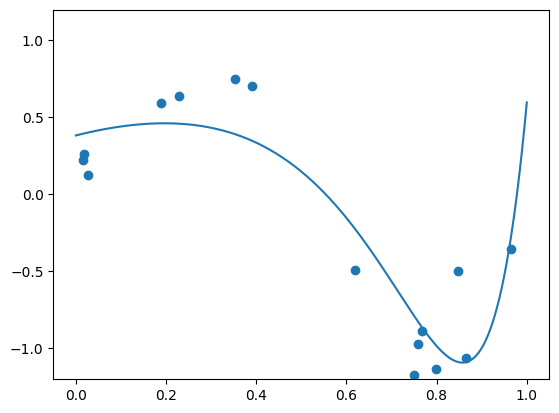

[[ 0.3833199 ]
 [ 0.74072778]
 [-1.47042835]
 [-0.93555904]
 [-1.7085154 ]
 [-0.06864626]
 [-1.15345226]
 [ 0.06690367]
 [ 1.408283  ]
 [-1.17494055]
 [ 2.22569032]
 [ 0.60132568]
 [ 0.97777017]
 [-0.86086958]
 [ 1.71923499]
 [ 1.49281197]
 [-1.64620085]]
-----M =  18 ------lambda =  1


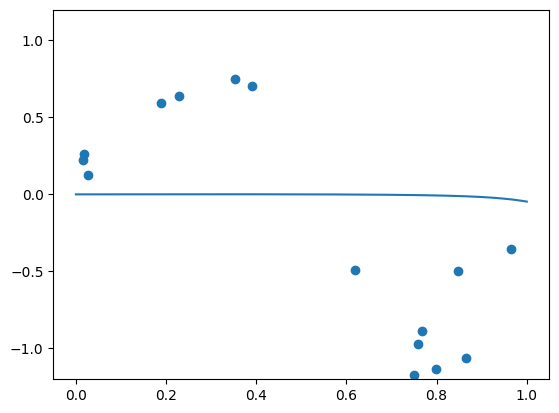

[[ 0.00078984]
 [ 0.00324322]
 [-0.00111291]
 [-0.00810674]
 [-0.00474686]
 [ 0.00575928]
 [-0.00766037]
 [-0.00672736]
 [ 0.00378916]
 [-0.00198069]
 [-0.00485234]
 [-0.00325701]
 [-0.01028013]
 [-0.00507519]
 [ 0.00330409]
 [ 0.0064002 ]
 [ 0.00072101]
 [-0.00738313]
 [-0.00902529]]
-----M =  18 ------lambda =  0.1


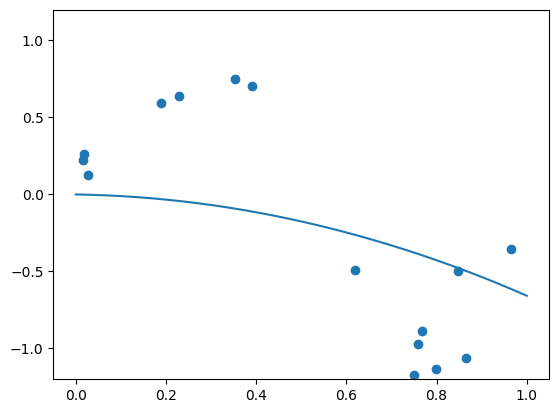

[[ 5.63324650e-05]
 [-4.49706005e-02]
 [-6.10224873e-01]
 [-9.84196289e-04]
 [ 4.58922621e-05]
 [-2.92126619e-04]
 [ 5.32875200e-05]
 [-6.74315049e-05]
 [-4.93399411e-04]
 [ 8.00923128e-04]
 [-7.49293935e-04]
 [ 8.65963043e-04]
 [-1.44299591e-04]
 [-7.19306795e-04]
 [ 6.36511969e-04]
 [-3.83238785e-05]
 [ 1.06594897e-04]
 [-8.02404189e-04]
 [-8.78073951e-04]]
-----M =  18 ------lambda =  0.001


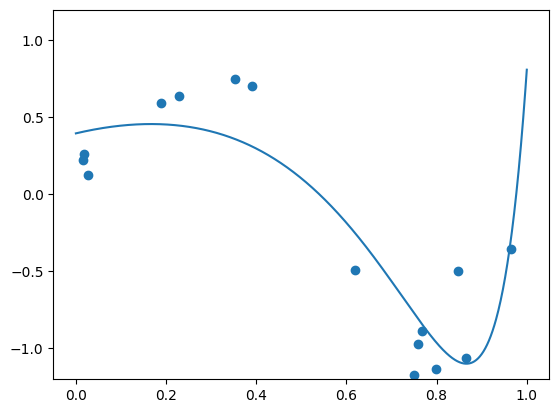

[[ 3.96819776e-01]
 [ 6.89562645e-01]
 [-1.76525267e+00]
 [-1.03966891e+00]
 [-4.39721939e-01]
 [-1.73895754e+00]
 [ 7.89332676e-01]
 [-5.90730741e-01]
 [ 2.09996551e+00]
 [-1.13365175e-02]
 [ 7.80909890e-02]
 [ 1.13841452e+00]
 [-9.13061774e-01]
 [-9.82182218e-01]
 [-1.15966995e-01]
 [ 1.06455770e+00]
 [ 5.86529204e-01]
 [ 2.51259511e-06]
 [ 1.56390665e+00]]
-----M =  18 ------lambda =  1e-06


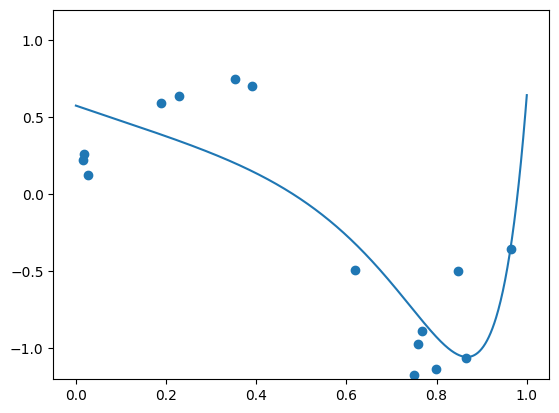

[[ 0.57703422]
 [-1.00317698]
 [ 0.17675793]
 [-0.48096146]
 [-1.00007396]
 [-1.06755507]
 [ 0.33219673]
 [-0.54599289]
 [ 0.22553408]
 [ 0.83559463]
 [-0.52985928]
 [ 0.16998042]
 [ 0.55666523]
 [-0.08098712]
 [ 0.70206538]
 [ 0.25935628]
 [ 0.87464263]
 [ 0.23015135]
 [ 0.41376654]]
-----M =  18 ------lambda =  1e-12


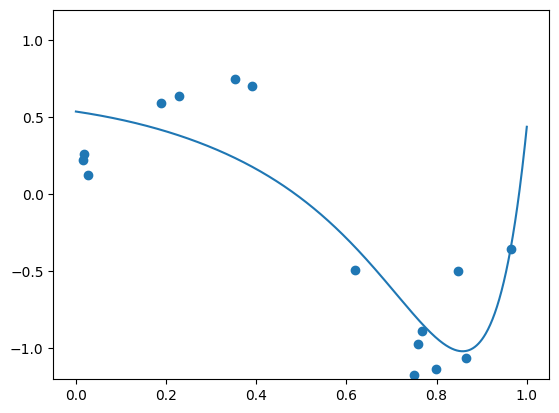

[[ 0.53862829]
 [-0.43349121]
 [-0.91737473]
 [-0.64871277]
 [ 0.05774419]
 [-1.04651808]
 [-0.28548578]
 [-1.64204747]
 [ 1.62384606]
 [ 0.50601204]
 [ 0.70748498]
 [ 1.29813648]
 [-0.81514206]
 [ 0.35617468]
 [ 1.31960831]
 [-0.62778414]
 [-0.7452879 ]
 [ 1.09252948]
 [ 0.10135813]]
-----M =  20 ------lambda =  1


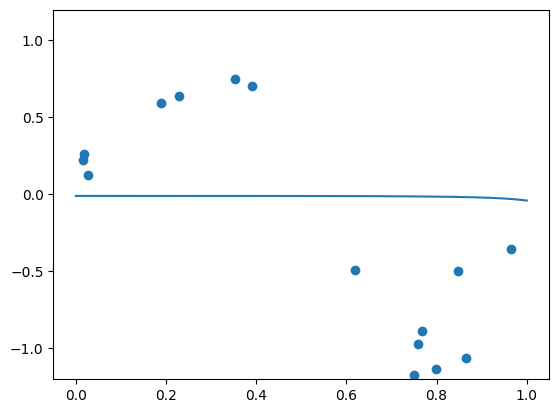

[[-0.00932765]
 [-0.00247999]
 [ 0.0051863 ]
 [ 0.00055057]
 [-0.00336173]
 [-0.01021302]
 [-0.00731965]
 [ 0.00247659]
 [-0.00640567]
 [ 0.00548776]
 [ 0.00492719]
 [ 0.00229316]
 [ 0.00054526]
 [-0.00358911]
 [-0.0043073 ]
 [-0.00413568]
 [ 0.00831395]
 [-0.00798788]
 [ 0.00068582]
 [-0.00679255]
 [-0.00388187]]
-----M =  20 ------lambda =  0.1


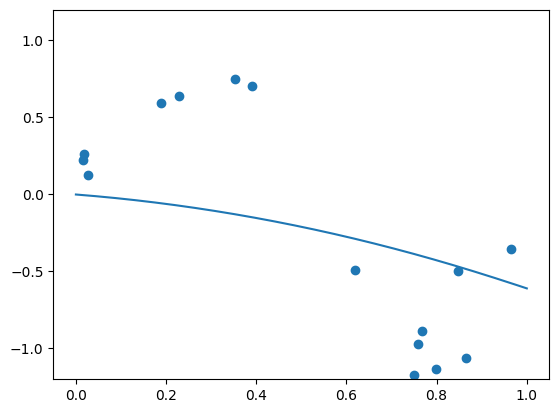

[[-1.88431956e-04]
 [-2.29461855e-01]
 [-3.78988647e-01]
 [-1.41533301e-03]
 [ 1.90883278e-04]
 [-8.53958839e-04]
 [-9.84345842e-04]
 [ 2.00432345e-04]
 [ 4.30631741e-04]
 [ 1.07997824e-04]
 [-8.46454625e-04]
 [-6.99765008e-04]
 [ 6.09072079e-04]
 [-7.09725348e-04]
 [ 6.61808637e-04]
 [ 3.93889997e-04]
 [ 8.06716634e-04]
 [ 8.59987258e-04]
 [ 5.68504808e-04]
 [-1.44776920e-04]
 [-3.49415902e-04]]
-----M =  20 ------lambda =  0.001


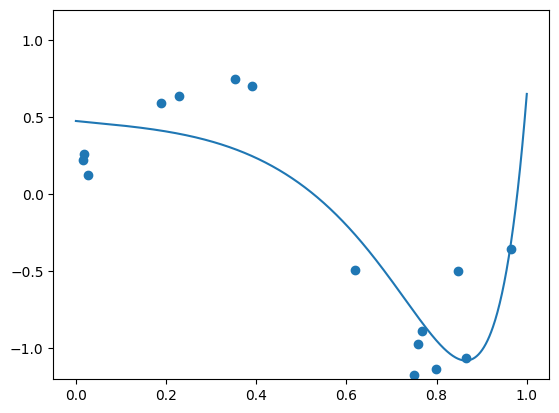

[[ 4.77239559e-01]
 [-2.85993050e-01]
 [ 2.10223034e-01]
 [-2.38922788e+00]
 [ 2.73852623e-01]
 [-1.25471459e+00]
 [ 9.85481708e-06]
 [-1.10051381e+00]
 [ 1.19397622e+00]
 [-3.87495483e-01]
 [ 1.46377905e+00]
 [ 8.16715896e-02]
 [ 1.40755283e+00]
 [ 2.33552180e-01]
 [-3.16288159e-01]
 [-8.12172331e-01]
 [ 2.37414715e-01]
 [ 4.87050129e-02]
 [ 1.90356833e+00]
 [ 8.22361050e-01]
 [-1.15447637e+00]]
-----M =  20 ------lambda =  1e-06


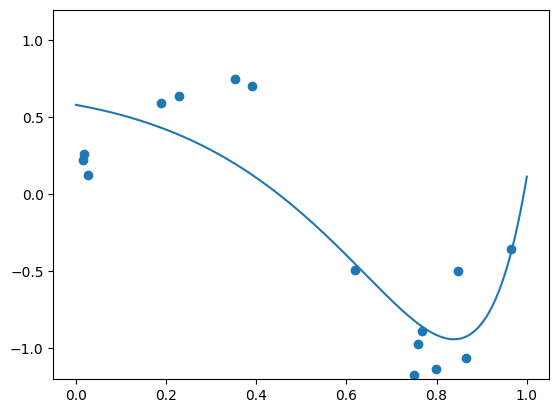

[[ 0.58190182]
 [-0.52731302]
 [-1.1442149 ]
 [-1.04538536]
 [-0.69964538]
 [ 0.05877906]
 [ 1.05246017]
 [ 0.88463445]
 [-0.77263622]
 [-0.97921946]
 [ 1.20362311]
 [ 0.6821988 ]
 [ 1.91109073]
 [-0.88581463]
 [-0.13367916]
 [ 0.39864304]
 [-0.78461135]
 [ 0.12443195]
 [-0.12278119]
 [ 0.24824726]
 [ 0.06496664]]
-----M =  20 ------lambda =  1e-12


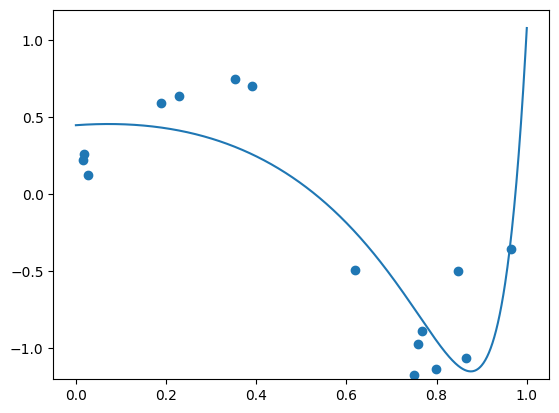

[[ 0.44979235]
 [ 0.21094824]
 [-1.37910728]
 [-0.73047194]
 [-0.72731063]
 [ 0.5666977 ]
 [-2.22213485]
 [ 2.07342103]
 [-0.72170309]
 [ 0.23776961]
 [-0.46868904]
 [ 0.95872385]
 [-0.14551338]
 [-2.24769684]
 [ 1.0509603 ]
 [-0.25436297]
 [ 1.89387774]
 [ 0.5998857 ]
 [ 1.72760989]
 [ 0.14981415]
 [ 0.05841518]]


In [ ]:

M_ = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
lamda = [1, 0.1, 1e-3, 1e-6, 1e-12]
 eta = [0.001, 0.01, 0.1, 1]

for m in M_:
  for l in lamda:
    for e in eta:
        print("-----M = ", m, "------lambda = ", l, "--------------eta = ", e)
        lasso = LassoRegressionGD(M=m, lam=l, eta=e)
        lasso.fit(X, t)
        pred = lasso.predict(X_test)
        plt.plot(X_test,pred)
        plt.scatter(X, t)
        plt.ylim([-1.2,1.2])
        plt.show()
        print(lasso.w)